Submitted by: Fawad Kirmani

Last Modified: 12/04/2021

GitHub Link: https://github.com/fkirmani/csce590-001/tree/main/Project

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

Load data

In [2]:
input_data = pd.read_csv('./data/pineallas_DataDownload_2425484_row_2015_2021.txt', delimiter="\t", 
                         low_memory=False)  
input_data.head()

,WBodyID,WaterBodyName,DataSource,StationID,StationName,Actual_StationID,Actual_Latitude,Actual_Longitude,DEP_WBID,SampleDate,...,DepthUnits,Parameter,Characteristic,Sample_Fraction,Result_Value,Result_Unit,QACode,Result_Comment,Original_Result_Value,Original_Result_Unit
0,890,Allen Creek,WIN_21FLPDEM,"=""19-08""",NaN,"=""19-08""",27.9407,-82.7596,1604B1,1/30/2018 9:35:00 AM,...,m,ChlaC_ugl,"Chlorophyll a, corrected for pheophytin",Total,4.3,ug/l,NaN,NaN,4.3,mg/m3
1,890,Allen Creek,WIN_21FLPDEM,"=""19-08""",NaN,"=""19-08""",27.9407,-82.7596,1604B1,1/30/2018 9:35:00 AM,...,m,chlb_ugl,Chlorophyll b,Total,0.5,ug/l,U,NaN,0.5,mg/m3
2,890,Allen Creek,WIN_21FLPDEM,"=""19-08""",NaN,"=""19-08""",27.9407,-82.7596,1604B1,1/30/2018 9:35:00 AM,...,m,chlc_ugl,Chlorophyll c,Total,0.5,ug/l,NaN,NaN,0.5,mg/m3
3,890,Allen Creek,WIN_21FLPDEM,"=""19-08""",NaN,"=""19-08""",27.9407,-82.7596,1604B1,1/30/2018 9:35:00 AM,...,m,Ecoli_100ml,Escherichia coli,Total,821.0,cfu/100ml,NaN,NaN,821,MPN/100 mL
4,890,Allen Creek,WIN_21FLPDEM,"=""19-08""",NaN,"=""19-08""",27.9407,-82.7596,1604B1,1/30/2018 9:35:00 AM,...,m,NH3_N_ugl,"Nitrogen, ammonia as N",Total,90.0,ug/l,NaN,NaN,0.09,mg/L


In [3]:
input_data_pivot = input_data.pivot_table(columns="Parameter", 
                       index=["SampleDate", "ActivityDepth", "WBodyID", "Result_Comment"], 
                       values="Result_Value").reset_index()
input_data_pivot

Parameter,SampleDate,ActivityDepth,WBodyID,Result_Comment,245T_ugl,24D_ugl,3Hydroxycarbofuran_ugl,Acifluorfen_ugl,Ag_ugl,Al_ugl,...,Toxaphene_ugl,Turb_ntu,Zn_ugl,alphaBHC_ugl,betaBHC_ugl,chlb_ugl,chlc_ugl,diazinon_ugl,hardness_mglCaCO3,pH
0,1/1/2016 12:00:00 AM,0.500000,5074,Water Institute Calculated,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/1/2017 12:00:00 AM,0.500000,5074,Water Institute Calculated,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1/1/2018 12:00:00 AM,0.500000,5074,Water Institute Calculated,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1/10/2017 12:00:00 AM,0.457317,14143,**U**,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1/10/2019 11:10:00 AM,0.500000,20009,D,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25211,9/9/2019 9:57:00 AM,0.200000,7382,I - Final dried residue < 2.5 mg as req'd by m...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25212,9/9/2019 9:57:00 AM,0.200000,7382,Sample fraction omitted per WIN guidelines,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25213,9/9/2019 9:57:00 AM,0.198000,7382,no visible particles,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.93
25214,9/9/2019 9:58:00 AM,0.939000,7382,no visible particles,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.83


In [4]:
input_data_pivot.rename(columns={'Sucralose_ug/l':'Sucralose_ugl'}, inplace=True)

In [5]:
# input_data_pivot_algal = input_data_pivot[input_data_pivot['Result_Comment'].str.contains('algal' or 'algae')]

In [6]:
# input_data_pivot_algal.shape

summarizing statistics of input_data_pivot dataframe

In [7]:
summary = input_data_pivot.describe()
print(summary.columns)
summary

Index(['ActivityDepth', 'WBodyID', '245T_ugl', '24D_ugl',
       '3Hydroxycarbofuran_ugl', 'Acifluorfen_ugl', 'Ag_ugl', 'Al_ugl',
       'Alachlor_ugl', 'Aldicarb_ugl',
       ...
       'Toxaphene_ugl', 'Turb_ntu', 'Zn_ugl', 'alphaBHC_ugl', 'betaBHC_ugl',
       'chlb_ugl', 'chlc_ugl', 'diazinon_ugl', 'hardness_mglCaCO3', 'pH'],
      dtype='object', name='Parameter', length=146)


Parameter,ActivityDepth,WBodyID,245T_ugl,24D_ugl,3Hydroxycarbofuran_ugl,Acifluorfen_ugl,Ag_ugl,Al_ugl,Alachlor_ugl,Aldicarb_ugl,...,Toxaphene_ugl,Turb_ntu,Zn_ugl,alphaBHC_ugl,betaBHC_ugl,chlb_ugl,chlc_ugl,diazinon_ugl,hardness_mglCaCO3,pH
count,25216.000000,2.521600e+04,1.000,127.000000,1.000,1.000,8.000000,116.000000,30.000000,1.00,...,3.000000,3481.000000,26.000000,24.000000,24.000000,2471.000000,2476.000000,29.000000,1.0,10685.000000
mean,0.670188,1.768264e+04,0.002,0.167666,0.002,0.002,0.025000,52.250000,0.012234,0.02,...,0.031667,3.511514,9.153846,0.002063,0.005188,0.722278,1.311167,0.000144,78.8,7.892637
std,0.908931,1.508662e+05,NaN,0.741075,NaN,NaN,0.016036,68.576653,0.065683,NaN,...,0.001155,28.964917,5.091108,0.000065,0.002426,1.648807,1.828484,0.000107,NaN,0.484363
min,-0.018862,1.500000e+01,0.002,0.002000,0.002,0.002,0.010000,6.300000,0.000230,0.02,...,0.031000,0.100000,3.500000,0.001900,0.001900,0.200000,0.400000,0.000120,78.8,2.250000
25%,0.200000,9.620000e+02,0.002,0.005500,0.002,0.002,0.010000,20.000000,0.000240,0.02,...,0.031000,1.300000,5.000000,0.002000,0.004100,0.500000,0.500000,0.000120,78.8,7.630000
50%,0.260000,2.000000e+04,0.002,0.018000,0.002,0.002,0.025000,29.000000,0.000240,0.02,...,0.031000,2.000000,5.850000,0.002100,0.004100,0.500000,0.800000,0.000120,78.8,8.010000
75%,0.764000,2.000900e+04,0.002,0.073000,0.002,0.002,0.040000,56.000000,0.000247,0.02,...,0.032000,3.400000,15.000000,0.002100,0.004225,0.500000,1.500000,0.000120,78.8,8.170000
max,9.300000,4.000041e+06,0.002,6.700000,0.002,0.002,0.040000,534.000000,0.360000,0.02,...,0.033000,1700.000000,20.000000,0.002200,0.011000,52.200000,49.300000,0.000690,78.8,12.970000


Not every parameter is measured on every date the survey of water is conducted.

In [8]:
input_data_algal_no_null_columns = input_data_pivot.dropna(axis=1, how='all')
input_data_algal_no_null_columns

Parameter,SampleDate,ActivityDepth,WBodyID,Result_Comment,245T_ugl,24D_ugl,3Hydroxycarbofuran_ugl,Acifluorfen_ugl,Ag_ugl,Al_ugl,...,Toxaphene_ugl,Turb_ntu,Zn_ugl,alphaBHC_ugl,betaBHC_ugl,chlb_ugl,chlc_ugl,diazinon_ugl,hardness_mglCaCO3,pH
0,1/1/2016 12:00:00 AM,0.500000,5074,Water Institute Calculated,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/1/2017 12:00:00 AM,0.500000,5074,Water Institute Calculated,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1/1/2018 12:00:00 AM,0.500000,5074,Water Institute Calculated,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1/10/2017 12:00:00 AM,0.457317,14143,**U**,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1/10/2019 11:10:00 AM,0.500000,20009,D,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25211,9/9/2019 9:57:00 AM,0.200000,7382,I - Final dried residue < 2.5 mg as req'd by m...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25212,9/9/2019 9:57:00 AM,0.200000,7382,Sample fraction omitted per WIN guidelines,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25213,9/9/2019 9:57:00 AM,0.198000,7382,no visible particles,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.93
25214,9/9/2019 9:58:00 AM,0.939000,7382,no visible particles,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.83


#### creating labels for algal bloom

In [9]:
search = ['algal', 'algae']

In [10]:
input_data_pivot.loc[~input_data_pivot['Result_Comment'].str.contains('&'.join(search)),'label1'] = 0

input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("no evidence of algal bloom"),'label1'] = 0
input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("no visible algal bloom"),'label1'] = 0
# input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("no visible particle film"),'label1'] = 0
# input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("green color, slight film on filter"),'label1'] = 0
# input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("slight film on filter"),'label1'] = 0
# input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains(", clean filter"),'label1'] = 0
# input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("normal distribution potential outlier"),'label1'] = 0
input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("suspected algal bloom"),'label1'] = 1
input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("suspect pyrodinium algal bloom"),'label1'] = 1
input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("suspect algal bloom"),'label1'] = 1
input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("algal bloom evidence"),'label1'] = 2
input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("evidence of algal bloom"),'label1'] = 2
input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains(", algal bloom"),'label1'] = 2
input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("dense algae"),'label1'] = 3
input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("dense algal growth"),'label1'] = 3
input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("suspect increased algal productivity"),'label1'] = 3
input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("algae detritus"),'label1'] = 3
input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("heavy algal epiphytes"),'label1'] = 3
input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("algal epiphytes"),'label1'] = 3
input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("decayed algal debris"),'label1'] = 3
input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("brown green algal colonies"),'label1'] = 3
input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("algal debris"),'label1'] = 3
input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("red tide algal bloom"),'label1'] = 3
input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("thick algal growth altering flow"),'label1'] = 3
input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("stagnant turbid algal growth"),'label1'] = 3
input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("algal gr"),'label1'] = 3
input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("green algal mats"),'label1'] = 3
input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("thic algal lining"),'label1'] = 3
input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("algal colonies"),'label1'] = 3
input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("dense living and decaying algae"),'label1'] = 3
input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("algae and floating vegetation"),'label1'] = 3

In [11]:
input_data_pivot[['Result_Comment', 'label1']].loc[1111]

Parameter
Result_Comment    D
label1            0
Name: 1111, dtype: object

In [12]:
input_data_pivot[input_data_pivot['label1'].isnull()]

Parameter,SampleDate,ActivityDepth,WBodyID,Result_Comment,245T_ugl,24D_ugl,3Hydroxycarbofuran_ugl,Acifluorfen_ugl,Ag_ugl,Al_ugl,...,Turb_ntu,Zn_ugl,alphaBHC_ugl,betaBHC_ugl,chlb_ugl,chlc_ugl,diazinon_ugl,hardness_mglCaCO3,pH,label1


In [13]:
len(input_data_pivot['Result_Comment'].unique())

5312

Percentage of missing values in each parameter

In [14]:
for i in range(len(input_data_pivot.columns)):
    missing_data = input_data_pivot[input_data_pivot.columns[i]].isna().sum()
    perc = missing_data / len(input_data_pivot) * 100
    print('>%d,  missing entries: %d, percentage %.2f' % (i, missing_data, perc))

>0,  missing entries: 0, percentage 0.00
>1,  missing entries: 0, percentage 0.00
>2,  missing entries: 0, percentage 0.00
>3,  missing entries: 0, percentage 0.00
>4,  missing entries: 25215, percentage 100.00
>5,  missing entries: 25089, percentage 99.50
>6,  missing entries: 25215, percentage 100.00
>7,  missing entries: 25215, percentage 100.00
>8,  missing entries: 25208, percentage 99.97
>9,  missing entries: 25100, percentage 99.54
>10,  missing entries: 25186, percentage 99.88
>11,  missing entries: 25215, percentage 100.00
>12,  missing entries: 25215, percentage 100.00
>13,  missing entries: 25215, percentage 100.00
>14,  missing entries: 25192, percentage 99.90
>15,  missing entries: 25011, percentage 99.19
>16,  missing entries: 25183, percentage 99.87
>17,  missing entries: 25211, percentage 99.98
>18,  missing entries: 25207, percentage 99.96
>19,  missing entries: 25176, percentage 99.84
>20,  missing entries: 25187, percentage 99.88
>21,  missing entries: 24456, percent

Heatmap of missing values in each parameter/column

<AxesSubplot:xlabel='Parameter'>

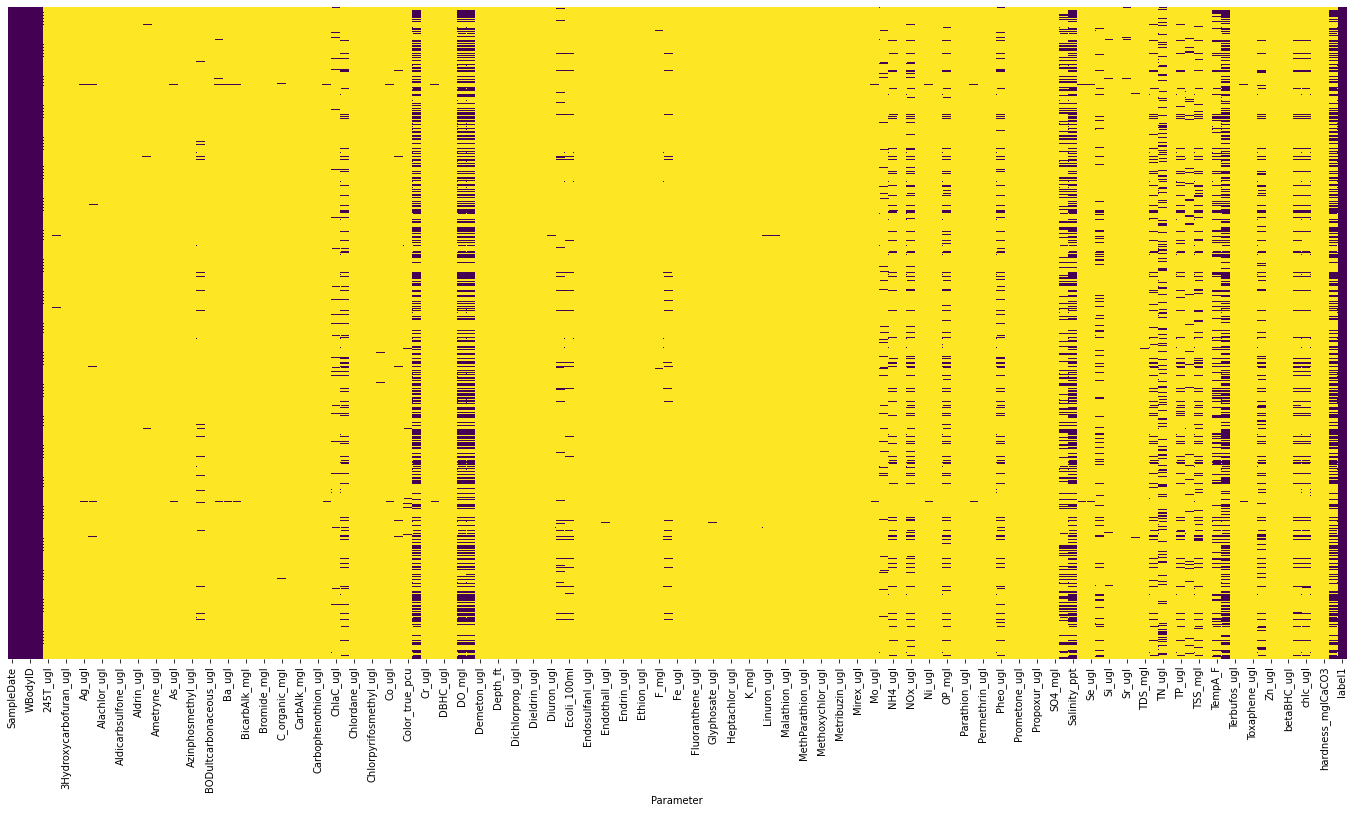

In [15]:
plt.rcParams["figure.figsize"] = [24, 12]
sns.heatmap(input_data_pivot.isna(), cbar=False, cmap='viridis', yticklabels=False)

From above figure, we can observe there are lot of missing data in every column except "SampleDate" and "ActivityDepth" which have no missing value.

##### Correlation Heatmap with label 1

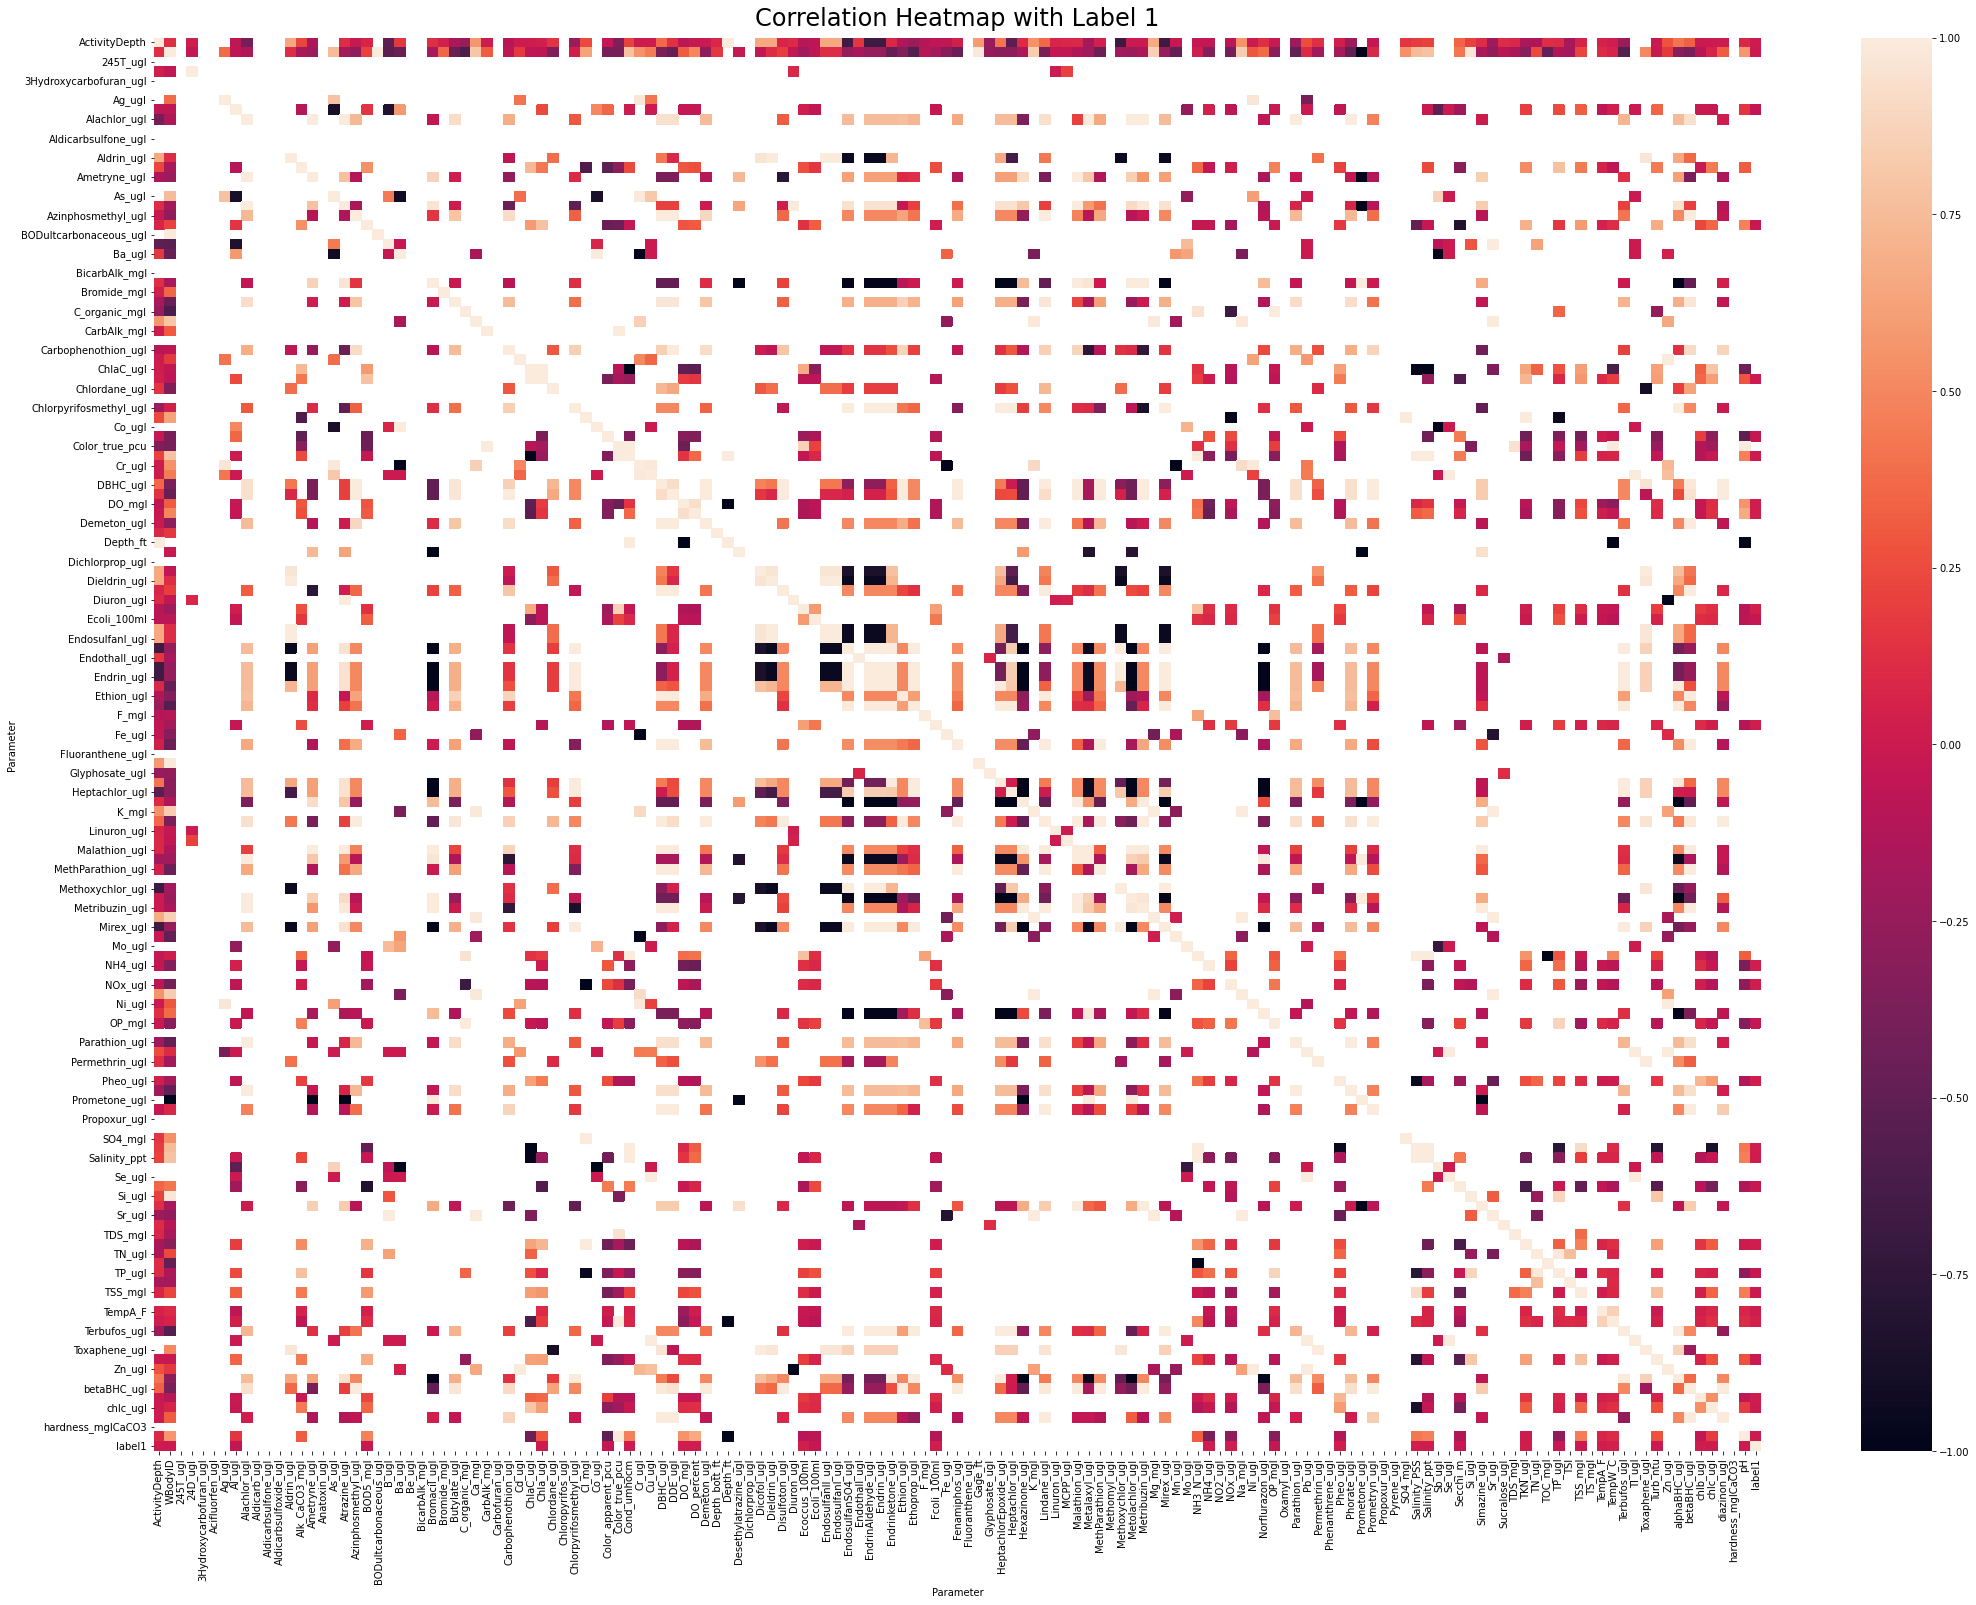

In [16]:
corr1 = input_data_pivot.corr()
# mask = np.triu(np.ones_like(input_data_pivot.corr(), dtype=bool))

# plotting the heatmap
plt.rcParams["figure.figsize"] = [36, 26]
heatmap = sns.heatmap(corr1)
heatmap.set_title('Correlation Heatmap with Label 1', fontdict={'fontsize':24}, pad=12);
heatmap.figure.savefig('./figs/heatmap_label1', dpi=300)

#### Top Correlated Features

In [17]:
corr1.reset_index()
for i, col in enumerate(corr1.columns):
    try:
        top = pd.DataFrame(corr1[(corr1[col]>0.9) | (corr1[col]<-0.9)][col].nlargest(8).to_frame()).reset_index()
        top = top.drop(top[top["Parameter"]==col].index)
        if top.empty:
            pass
        else: 
            print(top)
            print("\n")
    except:
        pass

  Parameter  ActivityDepth
1  Depth_ft            1.0


                Parameter   WBodyID
1  BODultcarbonaceous_ugl  1.000000
2                 Gage_ft  0.987103
3                  Si_ugl  0.972830
4           Prometone_ugl -1.000000


  Parameter    Ag_ugl
1    Cr_ugl  0.969717
2    Ni_ugl  0.969714


         Parameter  Alachlor_ugl
1    Parathion_ugl      1.000000
2      Phorate_ugl      1.000000
3  Metolachlor_ugl      0.999954
4    Metalaxyl_ugl      0.999951
5     Ametryne_ugl      0.999945
6   Metribuzin_ugl      0.999851
7     Atrazine_ugl      0.998943


            Parameter  Aldrin_ugl
1        Dieldrin_ugl    1.000000
2    EndosulfanII_ugl    1.000000
3     EndosulfanI_ugl    1.000000
4       Toxaphene_ugl    0.970725
5         Dicofol_ugl    0.965337
6   EndosulfanSO4_ugl   -0.940712
7  EndrinAldehyde_ugl   -0.940712


        Parameter  Ametryne_ugl
1    Alachlor_ugl      0.999945
2   Malathion_ugl      0.999695
3  Hexazinone_ugl      0.924660
4   Prometone_ugl     -1.0

Three highly correlated feature pairs are:

    1. Ecoli_100ml and Al_ugl
    2. Zn_ugl and Si_ugl
    3. DO_percent and Fe_diss_ugl

In [18]:
import math as mt

import xgboost as xgb
from matplotlib import pyplot
from numpy import sort
from scipy import interp
from itertools import cycle
from sklearn.feature_selection import SelectFromModel, f_classif
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import train_test_split
import seaborn as sn

In [19]:
input_data_pivot['label2'] = np.where(input_data_pivot['label1']==0, 0, 1)
input_data_algal_label2 = input_data_pivot.drop(columns=['label1'])
input_data_algal_label2.shape

(25216, 149)

##### Correlation Heatmap with label 2

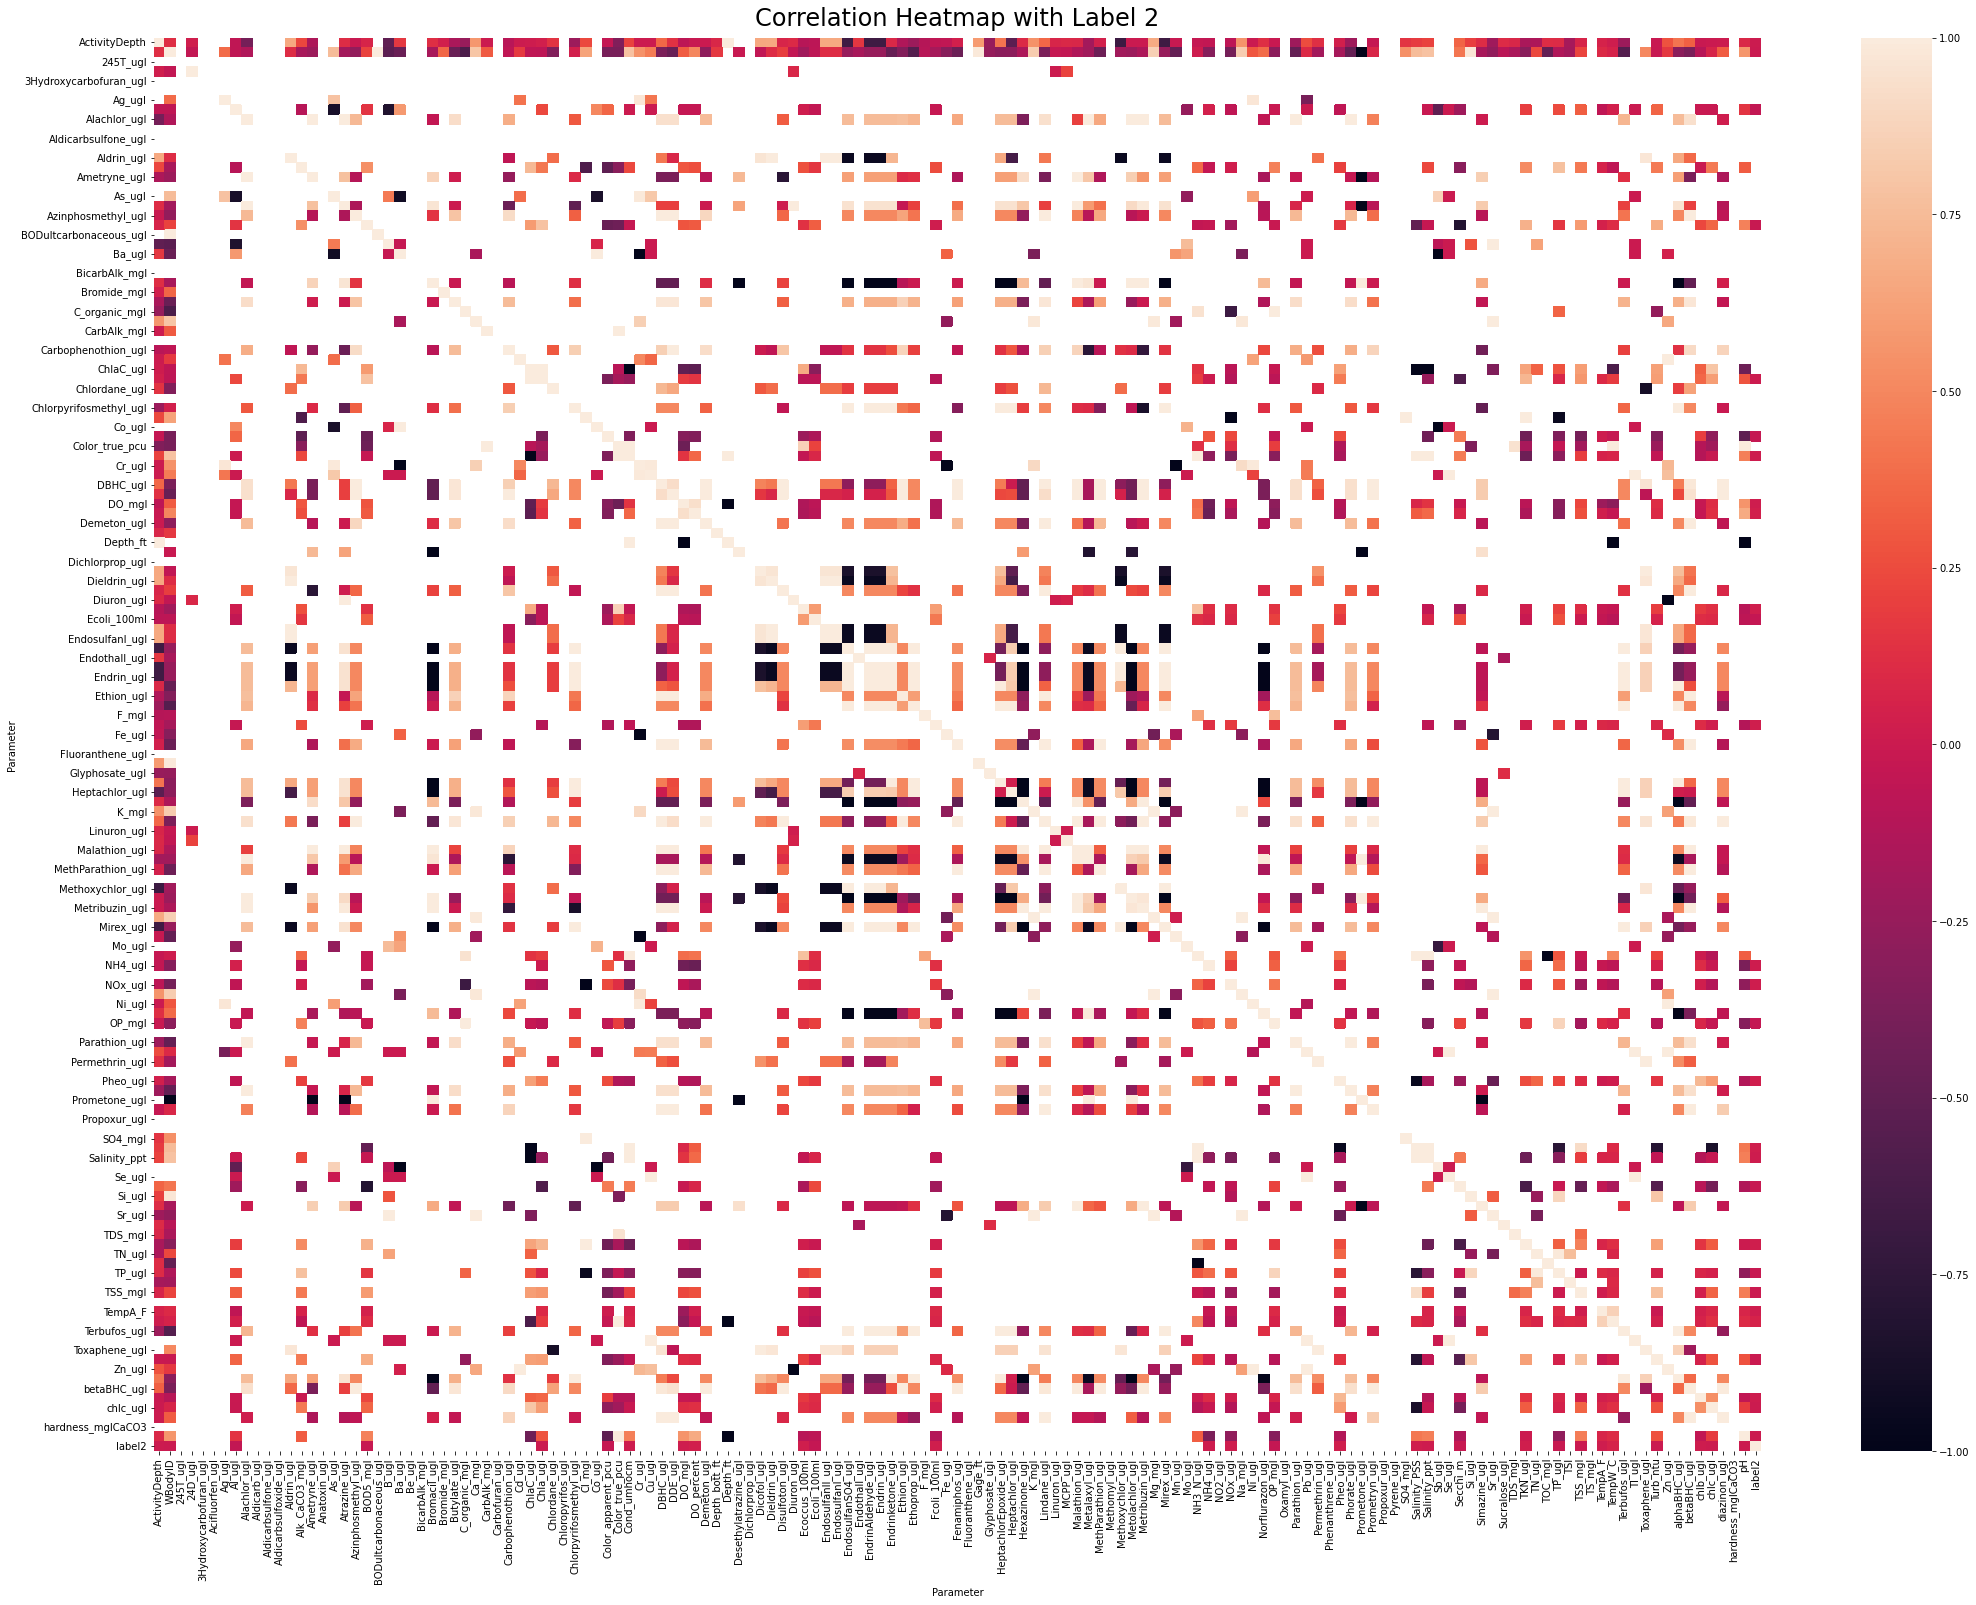

In [20]:
corr2 = input_data_algal_label2.corr()
# mask = np.triu(np.ones_like(input_data_pivot.corr(), dtype=bool))

# plotting the heatmap
plt.rcParams["figure.figsize"] = [36, 26]
heatmap = sns.heatmap(corr2)
heatmap.set_title('Correlation Heatmap with Label 2', fontdict={'fontsize':24}, pad=12);
heatmap.figure.savefig('./figs/heatmap_label2', dpi=300)

In [ ]:
# corr2.reset_index()
# for i, col in enumerate(corr2.columns):
#     try:
#         top = pd.DataFrame(corr2[(corr2[col]>0.9) | (corr2[col]<-0.9)][col].nlargest(8).to_frame()).reset_index()
#         top = top.drop(top[top["Parameter"]==col].index)
#         if top.empty:
#             pass
#         else: 
#             print(top)
#             print("\n")
#     except:
#         pass

#### Imputing missing values

In [22]:
input_data_algal_imputed = input_data_algal_label2.drop(columns=['Result_Comment', 'SampleDate', 'WBodyID']) #, 'Al_ugl', 'BOD5_mgl', 'Color_apparent_pcu'

# Imputing missing values
imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')
for i in range(len(input_data_algal_imputed.columns)):
    input_data_algal_imputed[input_data_algal_imputed.columns[i]] = imputer.fit_transform(input_data_algal_imputed[input_data_algal_imputed.columns[i]].values.reshape(-1,1))[:,0]

input_data_algal_imputed

Parameter,ActivityDepth,245T_ugl,24D_ugl,3Hydroxycarbofuran_ugl,Acifluorfen_ugl,Ag_ugl,Al_ugl,Alachlor_ugl,Aldicarb_ugl,Aldicarbsulfone_ugl,...,Turb_ntu,Zn_ugl,alphaBHC_ugl,betaBHC_ugl,chlb_ugl,chlc_ugl,diazinon_ugl,hardness_mglCaCO3,pH,label2
0,0.500000,0.002,0.167666,0.002,0.002,0.025,52.25,0.012234,0.02,0.002,...,3.511514,9.153846,0.002063,0.005188,0.722278,1.311167,0.000144,78.8,7.892637,0.0
1,0.500000,0.002,0.167666,0.002,0.002,0.025,52.25,0.012234,0.02,0.002,...,3.511514,9.153846,0.002063,0.005188,0.722278,1.311167,0.000144,78.8,7.892637,0.0
2,0.500000,0.002,0.167666,0.002,0.002,0.025,52.25,0.012234,0.02,0.002,...,3.511514,9.153846,0.002063,0.005188,0.722278,1.311167,0.000144,78.8,7.892637,0.0
3,0.457317,0.002,0.167666,0.002,0.002,0.025,52.25,0.012234,0.02,0.002,...,3.511514,9.153846,0.002063,0.005188,0.722278,1.311167,0.000144,78.8,7.892637,0.0
4,0.500000,0.002,0.167666,0.002,0.002,0.025,52.25,0.012234,0.02,0.002,...,3.511514,9.153846,0.002063,0.005188,0.722278,1.311167,0.000144,78.8,7.892637,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25211,0.200000,0.002,0.167666,0.002,0.002,0.025,52.25,0.012234,0.02,0.002,...,3.511514,9.153846,0.002063,0.005188,0.722278,1.311167,0.000144,78.8,7.892637,0.0
25212,0.200000,0.002,0.167666,0.002,0.002,0.025,52.25,0.012234,0.02,0.002,...,1.800000,9.153846,0.002063,0.005188,0.722278,1.311167,0.000144,78.8,7.892637,0.0
25213,0.198000,0.002,0.167666,0.002,0.002,0.025,52.25,0.012234,0.02,0.002,...,3.511514,9.153846,0.002063,0.005188,0.722278,1.311167,0.000144,78.8,7.930000,0.0
25214,0.939000,0.002,0.167666,0.002,0.002,0.025,52.25,0.012234,0.02,0.002,...,3.511514,9.153846,0.002063,0.005188,0.722278,1.311167,0.000144,78.8,7.830000,0.0


#### Summary of the data after imputation

In [23]:
summary = input_data_algal_imputed.describe()
print(summary.columns)
summary

Index(['ActivityDepth', '245T_ugl', '24D_ugl', '3Hydroxycarbofuran_ugl',
       'Acifluorfen_ugl', 'Ag_ugl', 'Al_ugl', 'Alachlor_ugl', 'Aldicarb_ugl',
       'Aldicarbsulfone_ugl',
       ...
       'Turb_ntu', 'Zn_ugl', 'alphaBHC_ugl', 'betaBHC_ugl', 'chlb_ugl',
       'chlc_ugl', 'diazinon_ugl', 'hardness_mglCaCO3', 'pH', 'label2'],
      dtype='object', name='Parameter', length=146)


Parameter,ActivityDepth,245T_ugl,24D_ugl,3Hydroxycarbofuran_ugl,Acifluorfen_ugl,Ag_ugl,Al_ugl,Alachlor_ugl,Aldicarb_ugl,Aldicarbsulfone_ugl,...,Turb_ntu,Zn_ugl,alphaBHC_ugl,betaBHC_ugl,chlb_ugl,chlc_ugl,diazinon_ugl,hardness_mglCaCO3,pH,label2
count,25216.000000,2.521600e+04,25216.000000,2.521600e+04,2.521600e+04,25216.000000,25216.000000,25216.000000,25216.00,2.521600e+04,...,25216.000000,25216.000000,25216.000000,25216.000000,25216.000000,25216.000000,25216.000000,2.521600e+04,25216.000000,25216.000000
mean,0.670188,2.000000e-03,0.167666,2.000000e-03,2.000000e-03,0.025000,52.250000,0.012234,0.02,2.000000e-03,...,3.511514,9.153846,0.002063,0.005187,0.722278,1.311167,0.000144,7.880000e+01,7.892637,0.006861
std,0.908931,8.673789e-19,0.052386,8.673789e-19,8.673789e-19,0.000267,4.631223,0.002228,0.00,8.673789e-19,...,10.760499,0.160307,0.000002,0.000073,0.516047,0.572861,0.000004,1.421114e-14,0.315288,0.082546
min,-0.018862,2.000000e-03,0.002000,2.000000e-03,2.000000e-03,0.010000,6.300000,0.000230,0.02,2.000000e-03,...,0.100000,3.500000,0.001900,0.001900,0.200000,0.400000,0.000120,7.880000e+01,2.250000,0.000000
25%,0.200000,2.000000e-03,0.167666,2.000000e-03,2.000000e-03,0.025000,52.250000,0.012234,0.02,2.000000e-03,...,3.511514,9.153846,0.002063,0.005188,0.722278,1.311167,0.000144,7.880000e+01,7.892637,0.000000
50%,0.260000,2.000000e-03,0.167666,2.000000e-03,2.000000e-03,0.025000,52.250000,0.012234,0.02,2.000000e-03,...,3.511514,9.153846,0.002063,0.005188,0.722278,1.311167,0.000144,7.880000e+01,7.892637,0.000000
75%,0.764000,2.000000e-03,0.167666,2.000000e-03,2.000000e-03,0.025000,52.250000,0.012234,0.02,2.000000e-03,...,3.511514,9.153846,0.002063,0.005188,0.722278,1.311167,0.000144,7.880000e+01,7.910000,0.000000
max,9.300000,2.000000e-03,6.700000,2.000000e-03,2.000000e-03,0.040000,534.000000,0.360000,0.02,2.000000e-03,...,1700.000000,20.000000,0.002200,0.011000,52.200000,49.300000,0.000690,7.880000e+01,12.970000,1.000000


#### Sampling tarining and testing dataset for building machine learning model

In [24]:
X_train, X_test, y_train, y_test = train_test_split(input_data_algal_imputed.iloc[:,0:145], input_data_algal_imputed.iloc[:,145], 
                                                    random_state=42, test_size=0.2)

In [25]:
X_train = X_train.astype('float')
y_train = y_train.astype('int')
X_test = X_test.astype('float')
y_test = y_test.astype('int')

In [26]:
df_train_balanced_One = input_data_algal_imputed.loc[input_data_algal_imputed['label2'] == 1]
print(len(df_train_balanced_One))
df_train_balanced_Zero = input_data_algal_imputed.loc[input_data_algal_imputed['label2'] == 0]
print(len(df_train_balanced_Zero))

173
25043


### XGBoost Classifier

##### Hyperparameters for XGBoost Classifier

In [28]:
max_depth = [2, 3, 5]
learning_rate = [0.01]
n_estimators = [100, 200, 300]
# use_label_encoder = [False]
eval_metric = ['error']
random_state = [80]
n_jobs = [-1]
gamma = [1, 1e1, 1e2, 1e3]
scale_pos_weight = [len(df_train_balanced_Zero.index) / len(df_train_balanced_One.index)]
# param_grid = dict(max_depth=max_depth, learning_rate=learning_rate, n_estimators=n_estimators,
#                   objective=objective, booster=booster, n_jobs=n_jobs, nthread=nthread, gamma=gamma,
#                   min_child_weight=min_child_weight, max_delta_step=max_delta_step, subsample=subsample,
#                   colsample_bytree=colsample_bytree, colsample_bylevel=colsample_bylevel, reg_alpha=reg_alpha,
#                   reg_lambda=reg_lambda, base_score=base_score, use_label_encoder = use_label_encoder,
#                   random_state=random_state)
xgb_param_grid = dict(max_depth=max_depth, learning_rate=learning_rate, n_estimators=n_estimators, random_state=random_state,
                      gamma=gamma, eval_metric=eval_metric, scale_pos_weight=scale_pos_weight,
                  n_jobs=n_jobs)

In [29]:
from sklearn.metrics import make_scorer
auc_predict_score = make_scorer(roc_auc_score)

##### Using Grid Search to find best hyperparameters

In [30]:
# # train model
model1 = XGBClassifier()
CV_xgb = GridSearchCV(estimator=model1, param_grid=xgb_param_grid, scoring=auc_predict_score, cv=3, return_train_score=False)
CV_xgb.fit(X_train, y_train)
CV_xgb.cv_results_

{'mean_fit_time': array([ 2.78008779,  5.31708845,  7.93528207,  3.74411909,  7.40937463,
        11.07378387,  6.36262576, 12.31964231, 18.09902859,  2.7034351 ,
         5.31983527,  7.92881266,  3.69335334,  7.29453969, 10.96282578,
         6.36826928, 12.30596948, 18.08473436,  2.69711232,  5.32223527,
         7.93214122,  3.74666222,  7.41386867, 11.06985887,  6.39274613,
        12.30396342, 18.09324845,  2.70009454,  5.31059647,  7.92193111,
         3.73819621,  7.38612429, 10.82159583,  6.14301729, 11.91591597,
        17.68234515]),
 'std_fit_time': array([1.14611234e-01, 3.93083627e-03, 5.03218916e-03, 5.73286571e-03,
        3.29436871e-03, 1.66137458e-03, 1.69992078e-01, 1.96224405e-01,
        2.03290103e-01, 5.20897708e-03, 1.94126962e-03, 1.32135860e-04,
        7.80592315e-03, 1.54187198e-02, 7.24871716e-02, 1.76927244e-01,
        1.87575226e-01, 2.02661170e-01, 3.38084079e-03, 6.64308046e-03,
        2.54514311e-03, 4.57768481e-03, 2.58655160e-03, 2.49969460e-03,
 

##### Best hyperparameters for XGBoost classifier trained on all features

In [31]:
print(CV_xgb.best_params_)

{'eval_metric': 'error', 'gamma': 100.0, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200, 'n_jobs': -1, 'random_state': 80, 'scale_pos_weight': 144.757225433526}


In [76]:
# # eval model
# y_pred1 = cross_val_predict(CV_xgb, X_test, y_test, cv=3, method='predict_proba')[:, 1]
y_pred1 = CV_xgb.predict_proba(X_test)[:, 1]
print('Overall AUC:', roc_auc_score(y_test, y_pred1))
accuracy = accuracy_score(y_test, y_pred1.round(), normalize=True)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

confusion_matrix = confusion_matrix(y_test, y_pred1.round())
print(confusion_matrix)
print(classification_report(y_test, y_pred1.round()))
specificity = confusion_matrix[0, 0] / (confusion_matrix[0, 0] + confusion_matrix[0, 1])
sensitivity = confusion_matrix[1, 1] / (confusion_matrix[1, 0] + confusion_matrix[1, 1])
print("n=%d, Accuracy: %.2f%%, specificity: %.2f%%, sensitivity: %.2f%%" % (
    X_train.shape[1], accuracy * 100.0, specificity * 100.0, sensitivity * 100.0))

Overall AUC: 0.9382931753638623
[[4551  457]
 [  13   23]]
              precision    recall  f1-score   support

           0       1.00      0.91      0.95      5008
           1       0.05      0.64      0.09        36

    accuracy                           0.91      5044
   macro avg       0.52      0.77      0.52      5044
weighted avg       0.99      0.91      0.94      5044

n=145, Accuracy: 90.68%, specificity: 90.87%, sensitivity: 63.89%


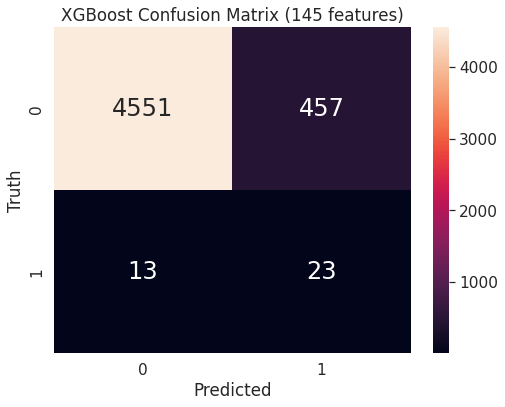

In [77]:
model_df_cm = pd.DataFrame(confusion_matrix, range(2), range(2)) 
plt.figure(figsize = (8, 6)) 
plt.title('XGBoost Confusion Matrix (145 features)')
sn.set(font_scale=1.4) #for label size 
sn.heatmap(model_df_cm, annot=True, annot_kws={"size": 24}, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.savefig('./figs/xgboost_cm_145_features.png', dpi=300)
# plt.show()

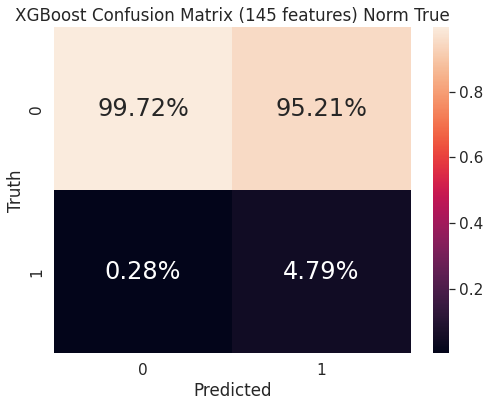

In [78]:
# from sklearn.metrics import plot_confusion_matrix
# plot_confusion_matrix(CV_xgb, X_test, y_test, values_format= '.0%', normalize='true'); 
# plt.title("normalize='true'");
model_df_cm = pd.DataFrame(confusion_matrix, range(2), range(2)) 
plt.figure(figsize = (8, 6)) 
plt.title('XGBoost Confusion Matrix (145 features) Norm True')
sn.set(font_scale=1.4) #for label size 
sn.heatmap(model_df_cm/model_df_cm.astype(np.float).sum(axis=0), annot=True, annot_kws={"size": 24}, fmt='.2%')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.savefig('./figs/xgboost_cm_145_features_norm.png', dpi=300)
# plt.show()

/home/fkirmani/.local/lib/python3.6/site-packages/ipykernel_launcher.py:28: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


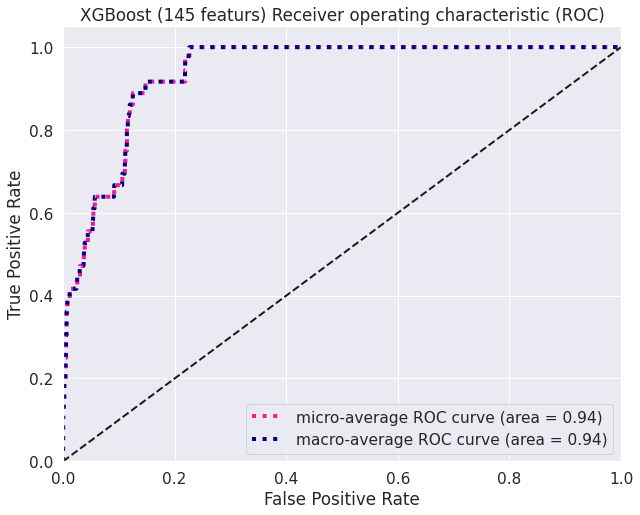

In [35]:
n_classes = 2

plt.figure(figsize = (10, 8)) 

# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred1)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred1.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
# plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes-97), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost (145 featurs) Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.savefig('./figs/XGBoost_ROC_145_features.png', dpi=300)
plt.show()

### Random Forest Classifier

##### Hyperparameters for Random Forest Classifier

In [36]:
n_estimators = [10, 25, 50]
max_depth = [2, 5, 10, 20]
max_features = ['auto', 'sqrt', 'log2']
max_leaf_nodes = [2, 3, 5]
n_jobs = [-1]
class_weight = ['balanced_subsample']
criterion = ['gini']
param_grid = dict(n_estimators=n_estimators, max_features=max_features, max_depth=max_depth, max_leaf_nodes=max_leaf_nodes,
                  n_jobs=n_jobs, criterion=criterion, class_weight=class_weight)

##### Using Grid Search with cross-validation to find best hyperparameters for Random Forest Classifier trained on all features

In [37]:
# # train model
model2 = RandomForestClassifier()
CV_rf = GridSearchCV(estimator=model2, param_grid=param_grid, scoring=auc_predict_score, cv=3, return_train_score=False)
CV_rf.fit(X_train, y_train)
CV_rf.cv_results_

{'mean_fit_time': array([0.94511104, 0.46220748, 0.30371785, 0.17786113, 0.23889764,
        0.30495985, 0.18225161, 0.24427414, 0.32293081, 0.18731745,
        0.23813001, 0.32274993, 0.1868004 , 0.23951379, 0.33670457,
        0.18151728, 0.23855424, 0.3317101 , 0.18369285, 0.23527559,
        0.32564465, 0.18124819, 0.23600745, 0.33265805, 0.18598382,
        0.23415073, 0.31596065, 0.17995707, 0.29925728, 0.33881116,
        0.1850903 , 0.2351896 , 0.33880536, 0.18779349, 0.24482282,
        0.33445621, 0.18446445, 0.24538914, 0.33629441, 0.18424439,
        0.24873606, 0.34059604, 0.18428175, 0.25119305, 0.33100828,
        0.17967629, 0.21277873, 0.33232999, 0.18127108, 0.23833291,
        0.33219496, 0.18190392, 0.23787038, 0.32119044, 0.18902469,
        0.23413515, 0.32894476, 0.18454297, 0.24747348, 0.3370587 ,
        0.18505987, 0.2463793 , 0.33305351, 0.18035841, 0.24161975,
        0.33150578, 0.18741687, 0.23740149, 0.33086046, 0.18408704,
        0.27945073, 0.33089121,

##### Best hyperparameters for Random Forest Classifier trained on all features

In [38]:
print(CV_rf.best_params_)

{'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'max_leaf_nodes': 5, 'n_estimators': 25, 'n_jobs': -1}


In [79]:
# # eval model
# y_pred1 = cross_val_predict(CV_rf, X_test, y_test, cv=3, method='predict_proba')[:, 1]
y_pred1 = CV_rf.predict_proba(X_test)[:, 1]
print('Overall AUC:', roc_auc_score(y_test, y_pred1))
accuracy = accuracy_score(y_test, y_pred1.round(), normalize=True)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

confusion_matrix = confusion_matrix(y_test, y_pred1.round())
print(confusion_matrix)
print(classification_report(y_test, y_pred1.round()))
specificity = confusion_matrix[0, 0] / (confusion_matrix[0, 0] + confusion_matrix[0, 1])
sensitivity = confusion_matrix[1, 1] / (confusion_matrix[1, 0] + confusion_matrix[1, 1])
print("n=%d, Accuracy: %.2f%%, specificity: %.2f%%, sensitivity: %.2f%%" % (
    X_train.shape[1], accuracy * 100.0, specificity * 100.0, sensitivity * 100.0))

Overall AUC: 0.879348597799077
[[3818 1190]
 [   4   32]]
              precision    recall  f1-score   support

           0       1.00      0.76      0.86      5008
           1       0.03      0.89      0.05        36

    accuracy                           0.76      5044
   macro avg       0.51      0.83      0.46      5044
weighted avg       0.99      0.76      0.86      5044

n=145, Accuracy: 76.33%, specificity: 76.24%, sensitivity: 88.89%


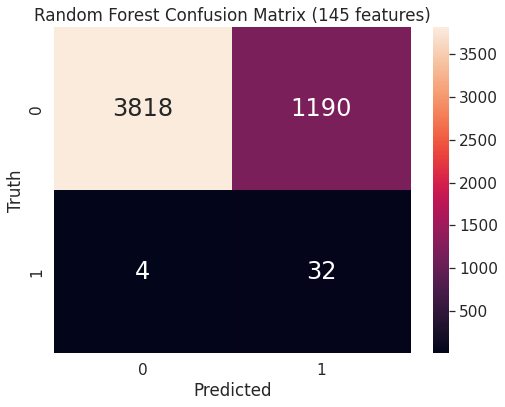

In [80]:
model_df_cm = pd.DataFrame(confusion_matrix, range(2), range(2)) 
plt.figure(figsize = (8, 6)) 
plt.title('Random Forest Confusion Matrix (145 features)')
sn.set(font_scale=1.4) #for label size 
sn.heatmap(model_df_cm, annot=True, annot_kws={"size": 24}, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.savefig('./figs/random_forest_cm_145_features.png', dpi=300)

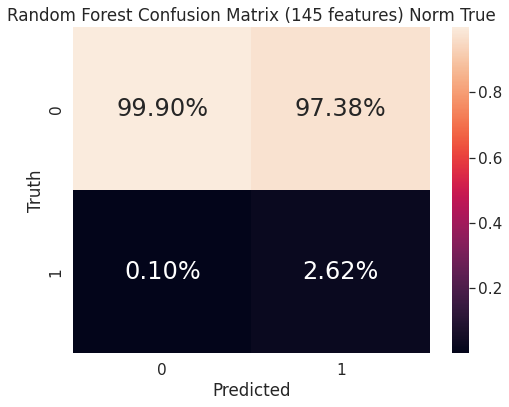

In [81]:
# from sklearn.metrics import plot_confusion_matrix
# plot_confusion_matrix(CV_xgb, X_test, y_test, values_format= '.0%', normalize='true'); 
# plt.title("normalize='true'");
model_df_cm = pd.DataFrame(confusion_matrix, range(2), range(2)) 
plt.figure(figsize = (8, 6)) 
plt.title('Random Forest Confusion Matrix (145 features) Norm True')
sn.set(font_scale=1.4) #for label size 
sn.heatmap(model_df_cm/model_df_cm.astype(np.float).sum(axis=0), annot=True, annot_kws={"size": 24}, fmt='.2%')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.savefig('./figs/random_forest_cm_145_features_norm.png', dpi=300)
# plt.show()

/home/fkirmani/.local/lib/python3.6/site-packages/ipykernel_launcher.py:28: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


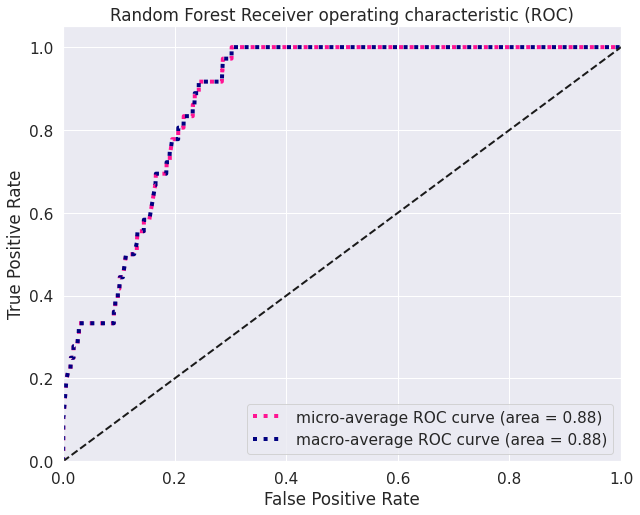

In [42]:
n_classes = 2

plt.figure(figsize = (10, 8)) 

# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred1)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred1.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
# plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes-97), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.savefig('./figs/random_forest_ROC_145_features.png', dpi=300)
# plt.show()

### Logistic Regression

##### Hypeparameters for Logistic Regression model

In [43]:
C = [1e-3, 1e-2, 1e-1, 1e0, 1e1]
class_weight = ['balanced']
max_iter = [1e8]
# multi_class = ['multinomial']
param_grid = dict(C=C, class_weight=class_weight, max_iter=max_iter)

##### Used Grid Search with CV to find best hyperparameters for Logistic Regression model

In [44]:
# # train model
model2 = LogisticRegression()
CV_lr = GridSearchCV(estimator=model2, param_grid=param_grid, scoring=auc_predict_score, cv=3, return_train_score=False)
CV_lr.fit(X_train, y_train)
CV_lr.cv_results_

/home/fkirmani/anaconda3/envs/aix360/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/fkirmani/anaconda3/envs/aix360/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://

{'mean_fit_time': array([14.83940371, 17.28299626, 24.08659911, 21.9006625 , 20.81202292]),
 'std_fit_time': array([ 4.70245588,  9.15418041, 11.39192838,  9.26360668,  9.62344354]),
 'mean_score_time': array([0.00677967, 0.00649254, 0.00724244, 0.00694728, 0.007634  ]),
 'std_score_time': array([0.00105628, 0.00117206, 0.00122039, 0.00108899, 0.00223009]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1.0, 10.0],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_class_weight': masked_array(data=['balanced', 'balanced', 'balanced', 'balanced',
                    'balanced'],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_iter': masked_array(data=[100000000.0, 100000000.0, 100000000.0, 100000000.0,
                    100000000.0],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params

##### Best hyperparameters for Logistic Regression model trained on all features

In [45]:
print(CV_lr.best_params_)

{'C': 0.001, 'class_weight': 'balanced', 'max_iter': 100000000.0}


In [82]:
# # eval model
# y_pred1 = cross_val_predict(CV_rf, X_test, y_test, cv=3, method='predict_proba')[:, 1]
y_pred1 = CV_lr.predict_proba(X_test)[:, 1]
print('Overall AUC:', roc_auc_score(y_test, y_pred1))
accuracy = accuracy_score(y_test, y_pred1.round(), normalize=True)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

confusion_matrix = confusion_matrix(y_test, y_pred1.round())
print(confusion_matrix)
print(classification_report(y_test, y_pred1.round()))
specificity = confusion_matrix[0, 0] / (confusion_matrix[0, 0] + confusion_matrix[0, 1])
sensitivity = confusion_matrix[1, 1] / (confusion_matrix[1, 0] + confusion_matrix[1, 1])
print("n=%d, Accuracy: %.2f%%, specificity: %.2f%%, sensitivity: %.2f%%" % (
    X_train.shape[1], accuracy * 100.0, specificity * 100.0, sensitivity * 100.0))

Overall AUC: 0.7315572861199857
[[4080  928]
 [  14   22]]
              precision    recall  f1-score   support

           0       1.00      0.81      0.90      5008
           1       0.02      0.61      0.04        36

    accuracy                           0.81      5044
   macro avg       0.51      0.71      0.47      5044
weighted avg       0.99      0.81      0.89      5044

n=145, Accuracy: 81.32%, specificity: 81.47%, sensitivity: 61.11%


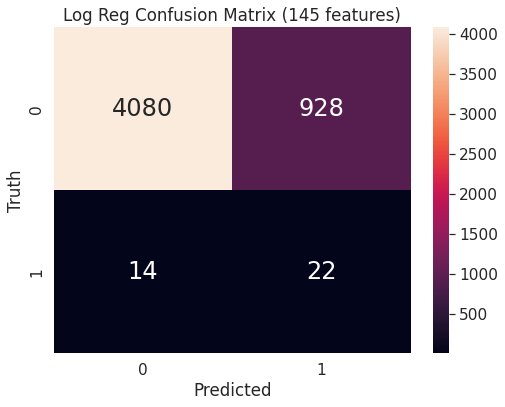

In [83]:
model_df_cm = pd.DataFrame(confusion_matrix, range(2), range(2)) 
plt.figure(figsize = (8, 6)) 
plt.title('Log Reg Confusion Matrix (145 features)')
sn.set(font_scale=1.4) #for label size 
sn.heatmap(model_df_cm, annot=True, annot_kws={"size": 24}, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.savefig('./figs/log_reg_cm_145_features.png', dpi=300)

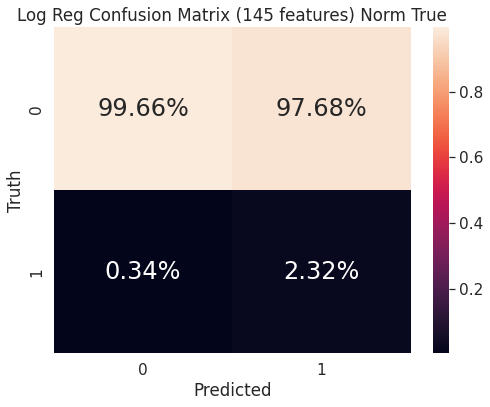

In [84]:
model_df_cm = pd.DataFrame(confusion_matrix, range(2), range(2)) 
plt.figure(figsize = (8, 6)) 
plt.title('Log Reg Confusion Matrix (145 features) Norm True')
sn.set(font_scale=1.4) #for label size 
sn.heatmap(model_df_cm/model_df_cm.astype(np.float).sum(axis=0), annot=True, annot_kws={"size": 24}, fmt='.2%')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.savefig('./figs/log_reg_cm_145_features_norm.png', dpi=300)
# plt.show()

/home/fkirmani/.local/lib/python3.6/site-packages/ipykernel_launcher.py:28: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


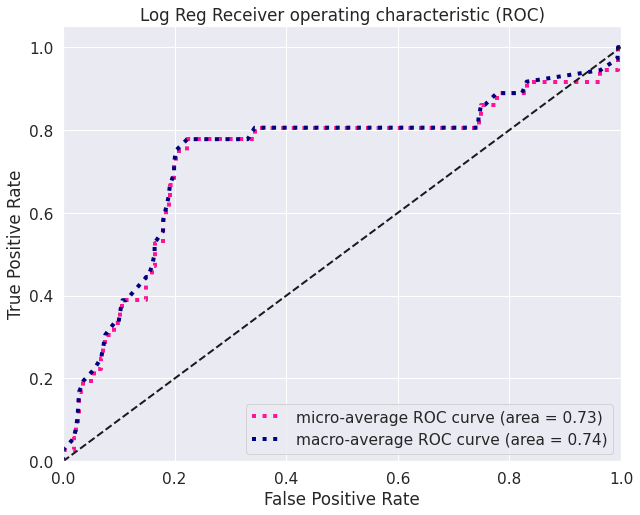

In [85]:
n_classes = 2

plt.figure(figsize = (10, 8)) 

# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred1)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred1.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
# plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes-97), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Log Reg Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.savefig('./figs/log_reg_ROC_145_features.png', dpi=300)
# plt.show()

### Feature Importance Analysis with XGBoost

In [50]:
# fit model no training data
model = XGBClassifier(max_depth=2, learning_rate=0.01, n_estimators=300, eval_metric='error', n_jobs=-1)
model.fit(X_train, y_train)

# feature importance
print(model.feature_importances_)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.11812731
 0.11097697 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0. 

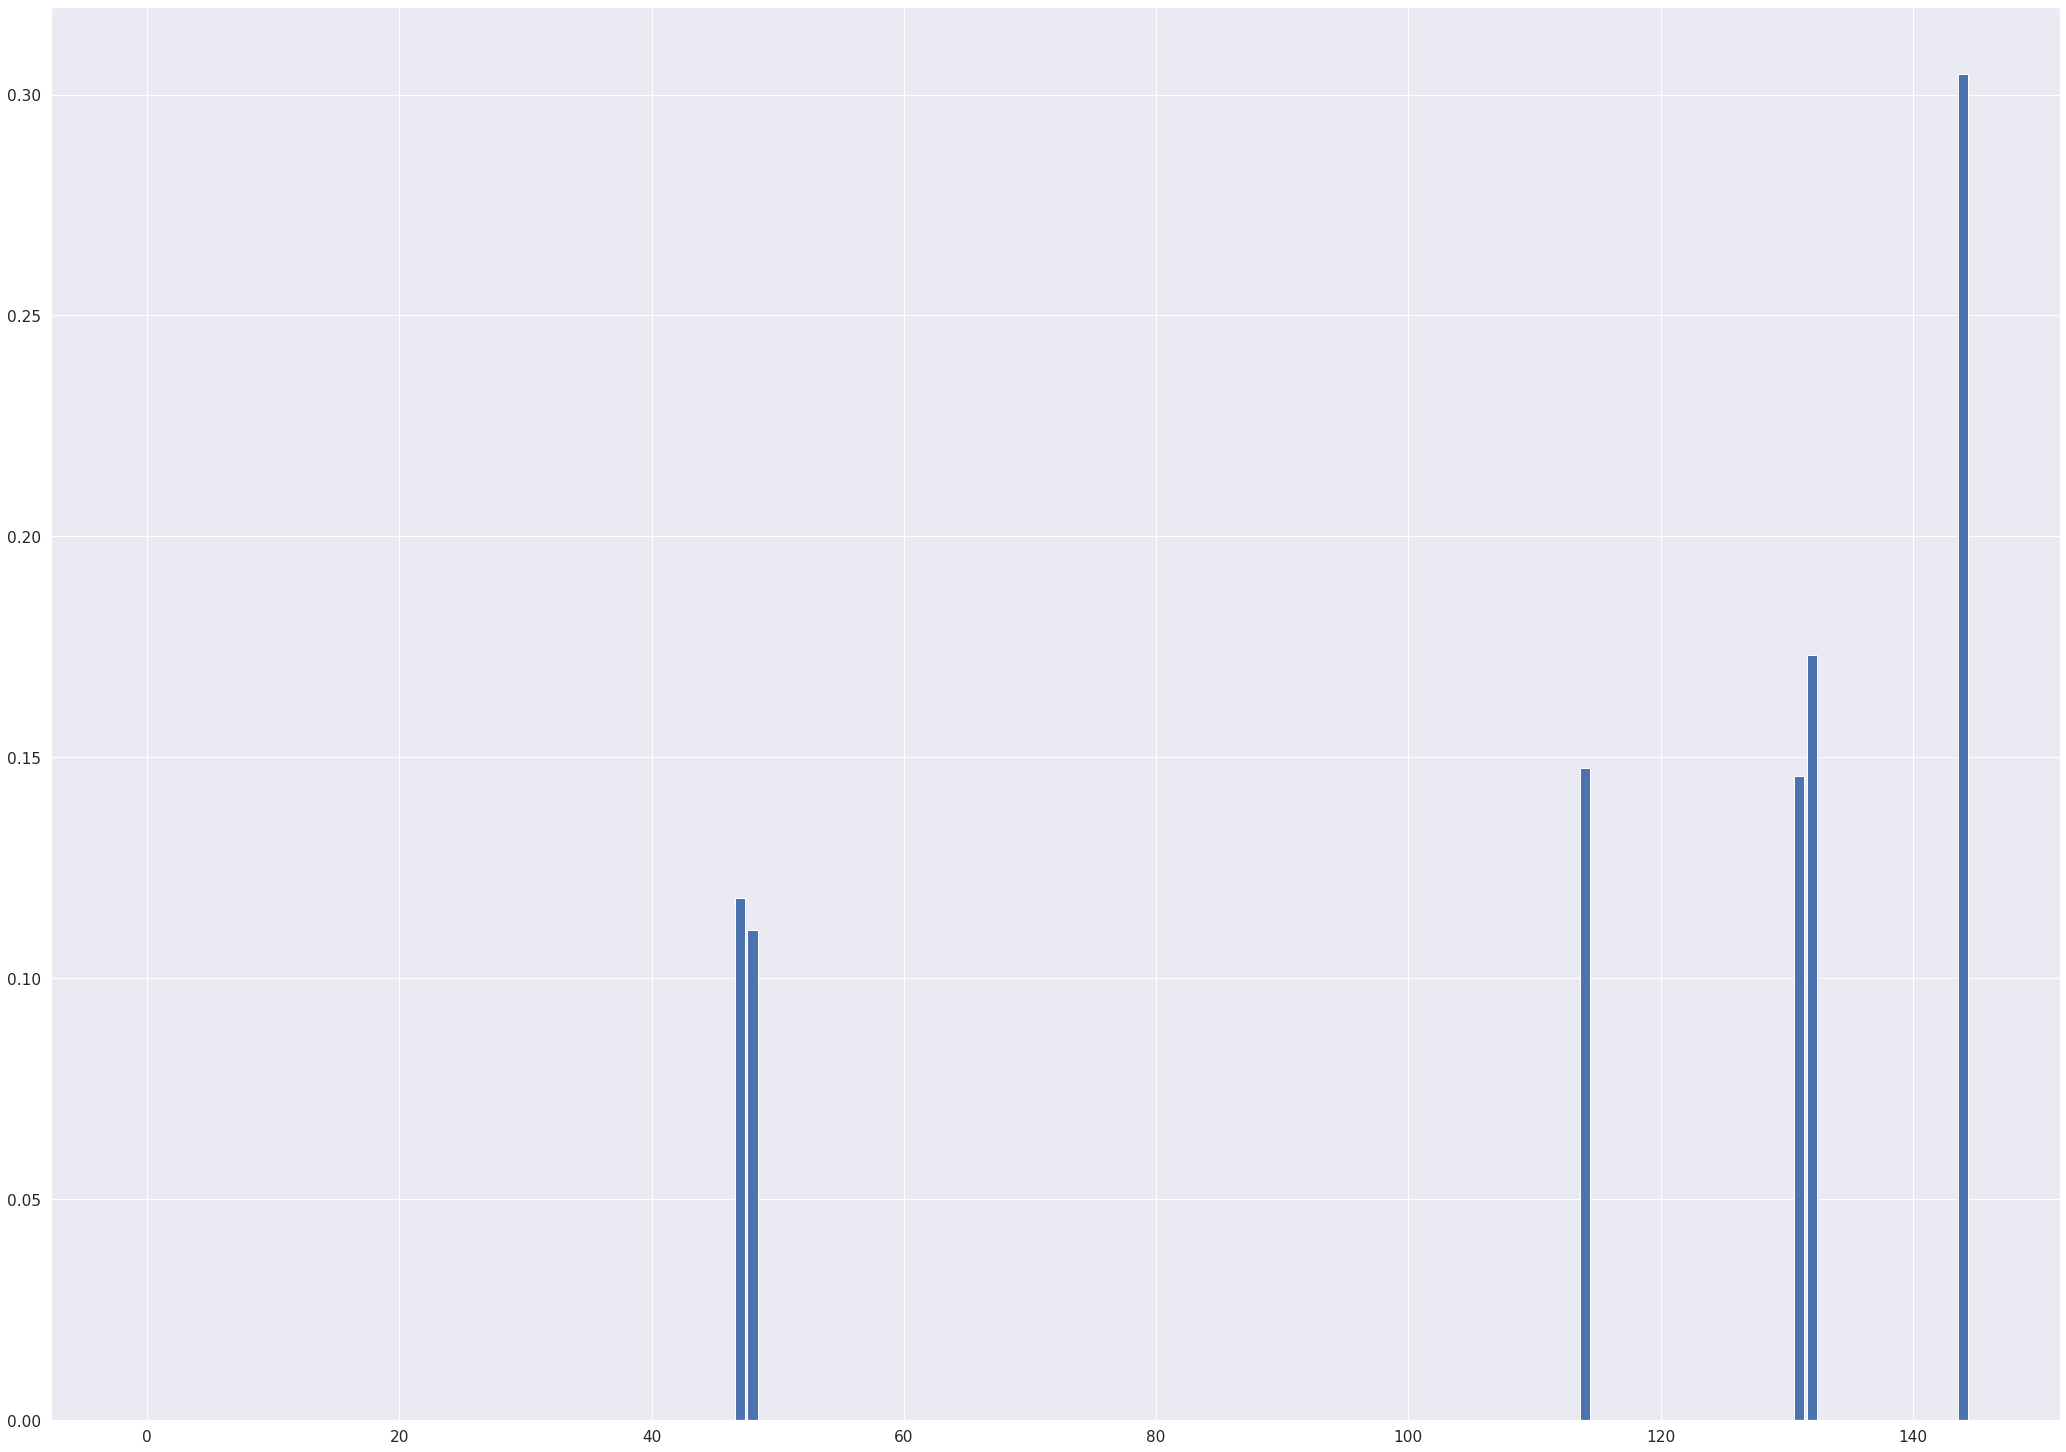

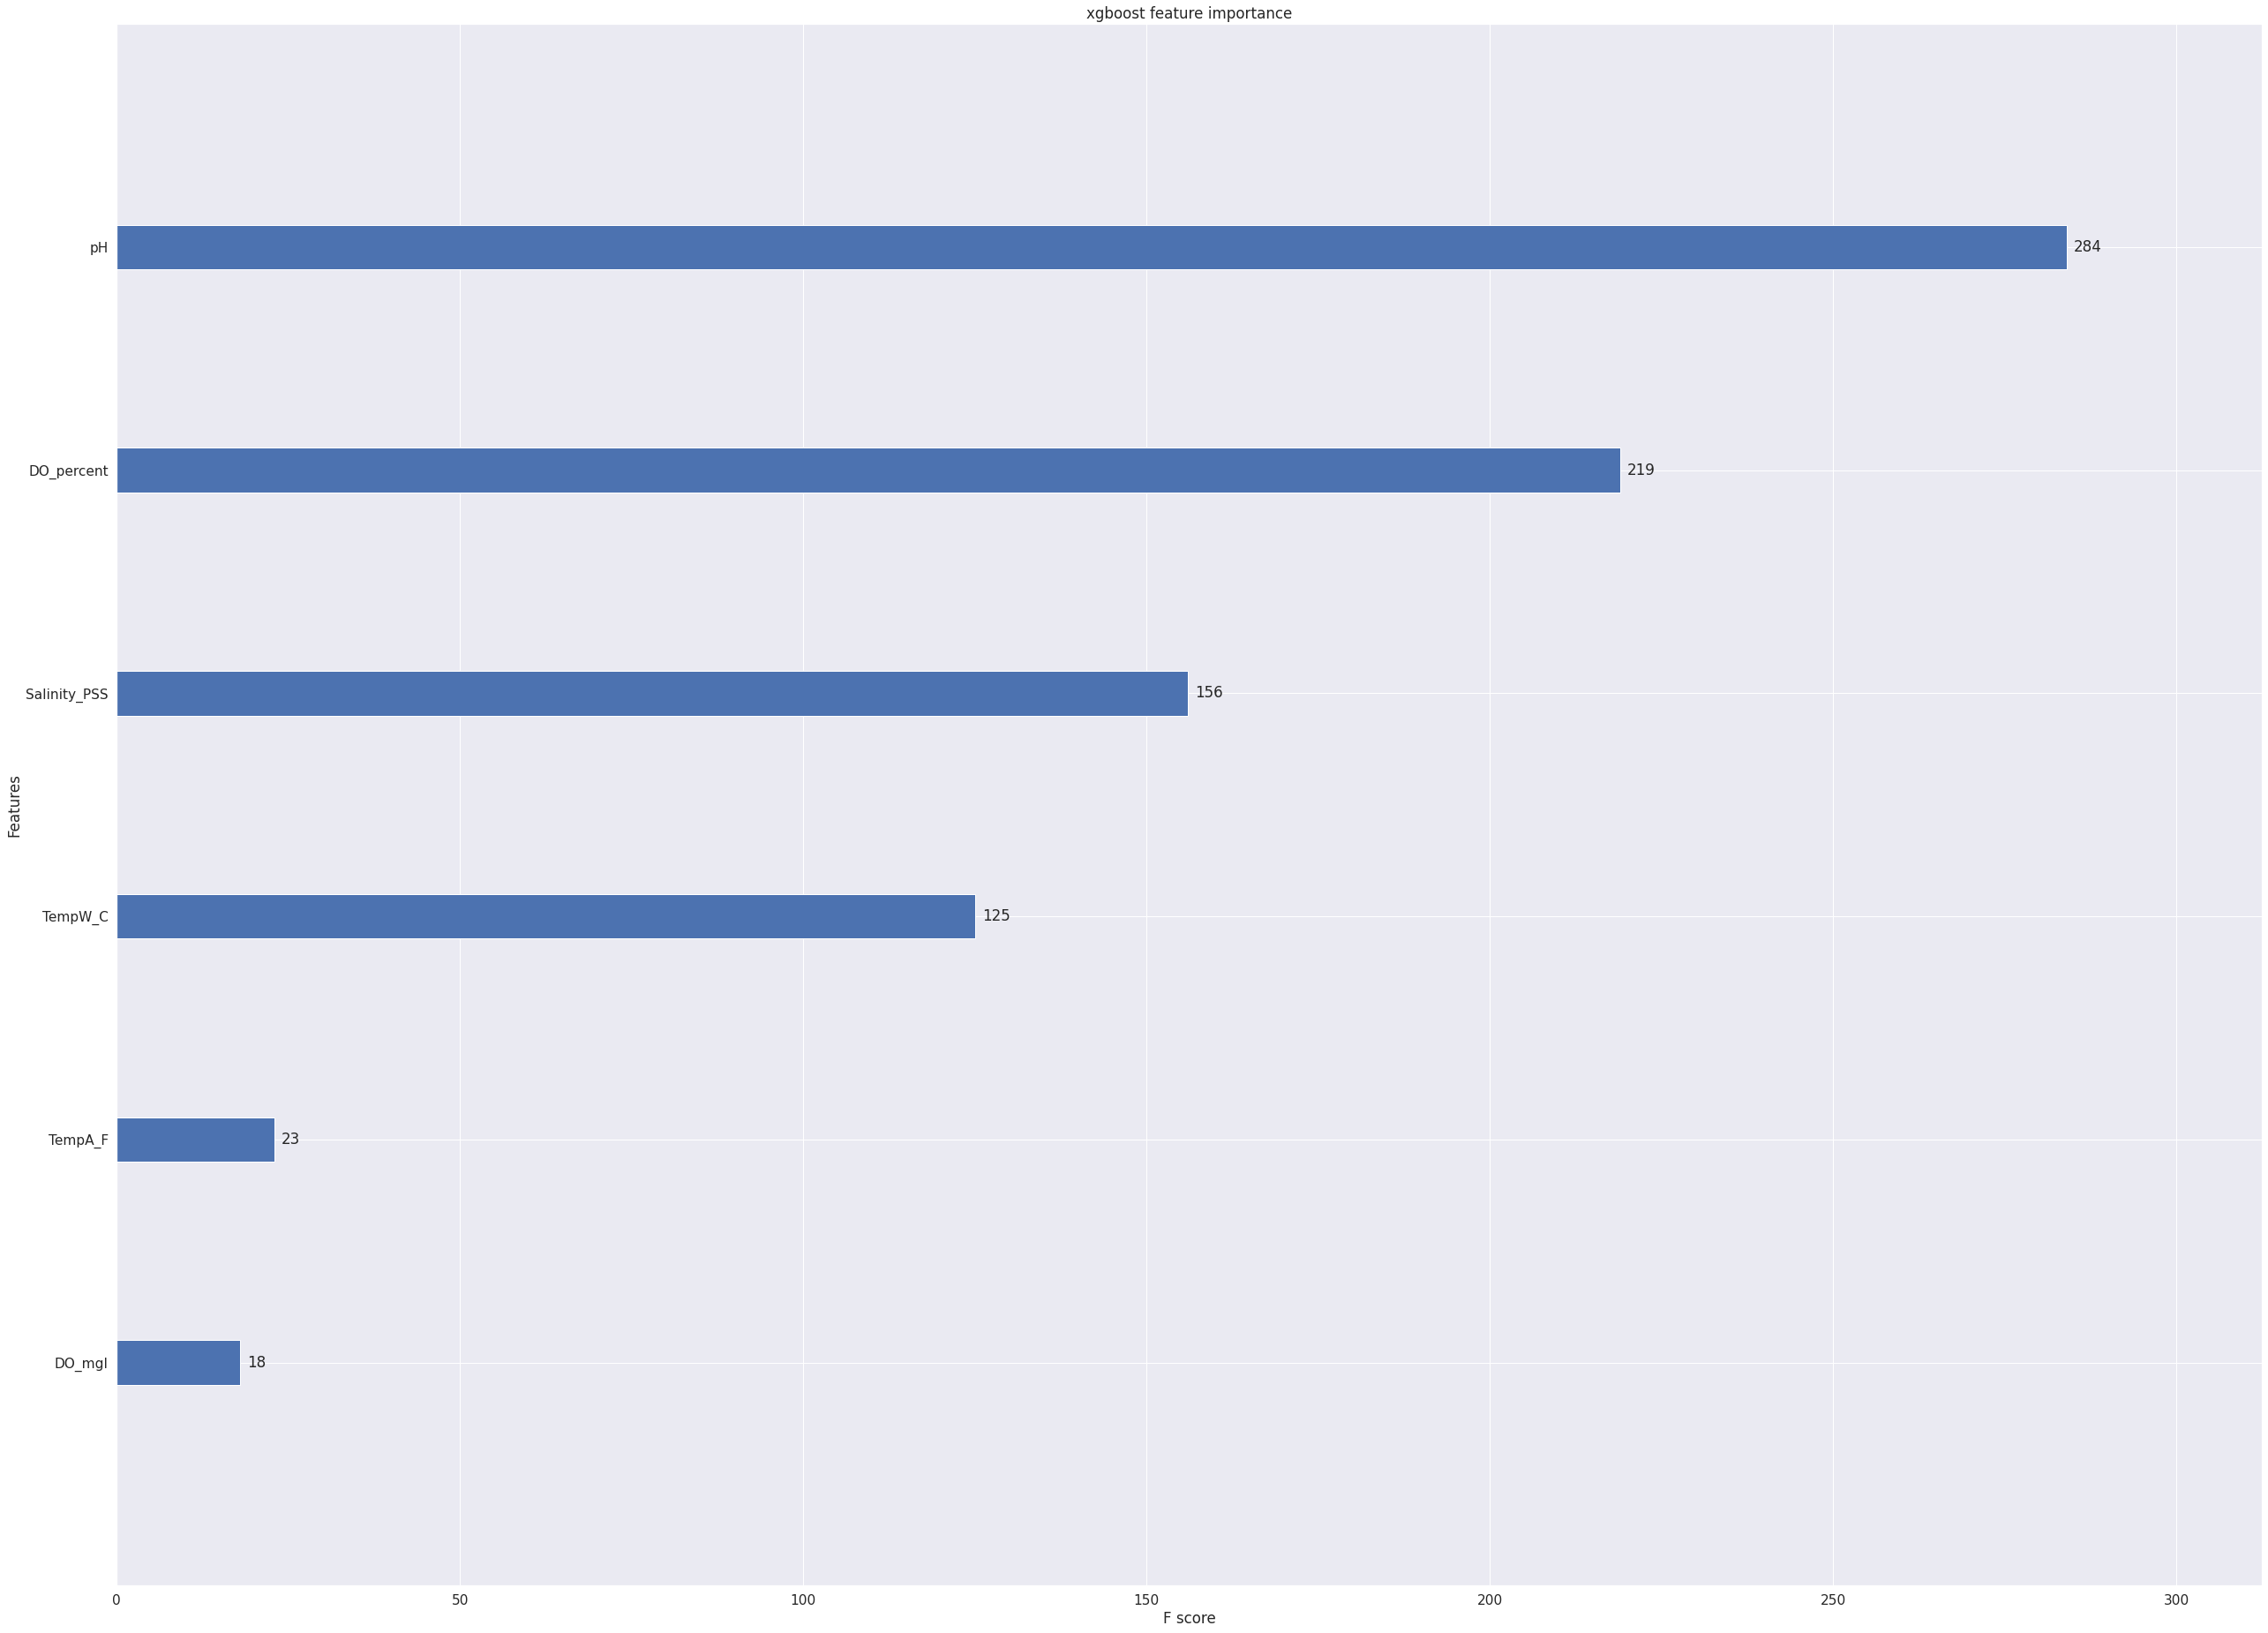

In [51]:
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
ax = plot_importance(model, title='xgboost feature importance')
ax.figure.tight_layout()
ax.figure.savefig('./figs/xgboost_feature_importance.png', dpi=100)
thresholds = sort(model.feature_importances_)
thresholds[::-1].sort()

### Building XGB Classifier on top features

In [52]:
selected_features = ['DO_mgl', 'DO_percent', 'pH', 'Salinity_PSS', 'TempW_C', 'TempA_F']
# selected_features = [47, 48, 114, 131, 132, 144]

In [53]:
X_train_selected_feat = X_train[selected_features]
# X_train_selected_feat = pd.DataFrame(X_train_selected_feat)

In [54]:
X_train_selected_feat

Parameter,DO_mgl,DO_percent,pH,Salinity_PSS,TempW_C,TempA_F
16656,6.265108,84.617505,7.892637,18.98539,25.570452,77.864184
18224,5.750000,94.000000,8.210000,35.88000,31.090000,77.864184
19662,6.265108,84.617505,6.760000,18.98539,25.570452,77.864184
4696,6.265108,84.617505,7.892637,18.98539,25.570452,77.864184
25149,6.265108,84.617505,7.892637,18.98539,25.570452,77.864184
...,...,...,...,...,...,...
21575,1.670000,25.200000,7.650000,18.98539,31.530000,82.940000
5390,6.265108,84.617505,7.892637,18.98539,25.570452,77.864184
860,10.190000,102.300000,8.550000,18.98539,15.500000,58.460000
15795,8.040000,113.700000,8.150000,18.98539,24.750000,80.060000


In [55]:
X_train_selected_feat.shape

(20172, 6)

#### Correlation between top features

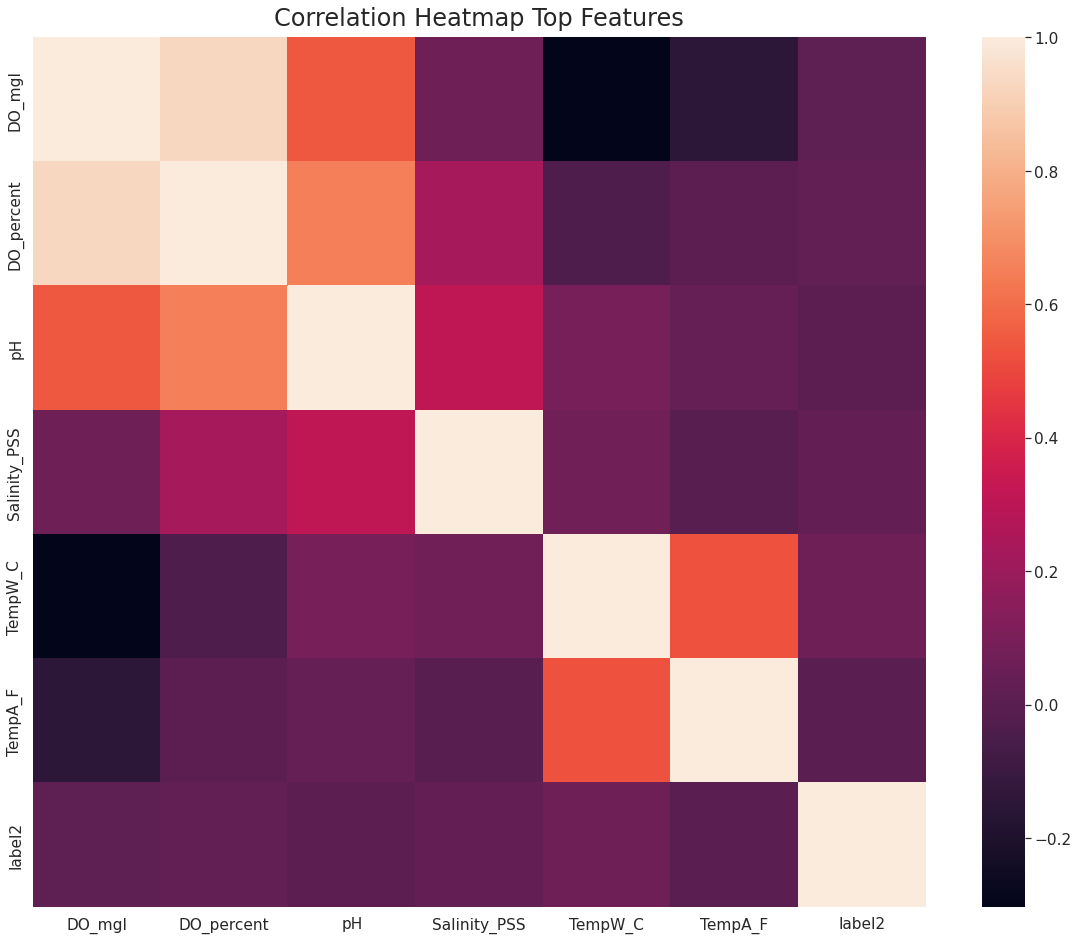

In [56]:
df_train_selected_feat = pd.concat([X_train_selected_feat, pd.DataFrame(y_train)], axis=1)
corr3 = df_train_selected_feat.corr()
# mask = np.triu(np.ones_like(input_data_pivot.corr(), dtype=bool))

# plotting the heatmap
plt.rcParams["figure.figsize"] = [20, 16]
heatmap = sns.heatmap(corr3)
heatmap.set_title('Correlation Heatmap Top Features', fontdict={'fontsize':24}, pad=12);
heatmap.figure.savefig('./figs/heatmap_label2_top_features', dpi=300)

In [57]:
corr3

,DO_mgl,DO_percent,pH,Salinity_PSS,TempW_C,TempA_F,label2
DO_mgl,1.000000,0.930895,0.543349,0.060340,-0.303667,-0.148847,0.015778
DO_percent,0.930895,1.000000,0.652375,0.232486,-0.037663,0.010362,0.027018
pH,0.543349,0.652375,1.000000,0.309377,0.091472,0.038972,0.009681
Salinity_PSS,0.060340,0.232486,0.309377,1.000000,0.077212,-0.000005,0.030637
TempW_C,-0.303667,-0.037663,0.091472,0.077212,1.000000,0.530235,0.059903
TempA_F,-0.148847,0.010362,0.038972,-0.000005,0.530235,1.000000,0.005229
label2,0.015778,0.027018,0.009681,0.030637,0.059903,0.005229,1.000000


##### Top correlation pairs among important features

In [58]:
corr3.reset_index()
for i, col in enumerate(corr3.columns):
    try:
        top = pd.DataFrame(corr3[(corr3[col]>0.5) | (corr3[col]<-0.5)][col].nlargest(8).to_frame()).reset_index()
        top = top.drop(top[top["index"]==col].index)
        if top.empty:
            pass
        else: 
            print(top)
            print("\n")
    except:
        pass

        index    DO_mgl
1  DO_percent  0.930895
2          pH  0.543349


    index  DO_percent
1  DO_mgl    0.930895
2      pH    0.652375


        index        pH
1  DO_percent  0.652375
2      DO_mgl  0.543349


     index   TempW_C
1  TempA_F  0.530235


     index   TempA_F
1  TempW_C  0.530235




In [59]:
X_test_selected_feat = X_test[selected_features]
# X_test_selected_feat = pd.DataFrame(X_test_selected_feat)

#### Train XGBoost model on top six features with Grid Search and Cross-Validation to find best hyperparameters

In [60]:
# # train model
model4 = XGBClassifier()
CV_xgb2 = GridSearchCV(estimator=model4, param_grid=xgb_param_grid, scoring=auc_predict_score, cv=3, return_train_score=False)
CV_xgb2.fit(X_train_selected_feat, y_train)
CV_xgb2.cv_results_

{'mean_fit_time': array([0.35716963, 0.69913522, 1.04292607, 0.46560319, 0.91236266,
        1.34780121, 0.69919618, 1.38232557, 2.04990268, 0.35565591,
        0.69945534, 1.03527768, 0.46601295, 0.91105119, 1.35390075,
        0.6985515 , 1.38433671, 2.05238557, 0.35834503, 0.69909   ,
        1.04075718, 0.46446919, 0.9126792 , 1.3467598 , 0.70197837,
        1.38415766, 2.05118219, 0.35606519, 0.69170491, 1.02451293,
        0.46896553, 0.88066785, 1.30290826, 0.67929761, 1.32855543,
        1.97404162]),
 'std_fit_time': array([0.00342577, 0.00311538, 0.0044774 , 0.00513925, 0.00365795,
        0.00489353, 0.00474287, 0.00753056, 0.00308312, 0.00151024,
        0.00205705, 0.00252931, 0.00590971, 0.00351487, 0.00636018,
        0.00682349, 0.00911955, 0.00426241, 0.00091699, 0.00076008,
        0.00596338, 0.00395008, 0.00528744, 0.00079402, 0.00441502,
        0.00499685, 0.01389567, 0.0018911 , 0.0025623 , 0.00323521,
        0.00909748, 0.00702709, 0.01894988, 0.00707103, 0.009

##### Best hyperparameters for the XGBoost classifier trained on top six features

In [61]:
print(CV_xgb2.best_params_)

{'eval_metric': 'error', 'gamma': 1, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'n_jobs': -1, 'random_state': 80, 'scale_pos_weight': 144.757225433526}


In [92]:
# # eval model
# y_pred1 = cross_val_predict(CV_xgb, X_test, y_test, cv=3, method='predict_proba')[:, 1]
y_pred1 = CV_xgb2.predict_proba(X_test_selected_feat)[:, 1]
print('Overall AUC:', roc_auc_score(y_test, y_pred1))
accuracy = accuracy_score(y_test, y_pred1.round(), normalize=True)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

confusion_matrix = confusion_matrix(y_test, y_pred1.round())
print(confusion_matrix)
print(classification_report(y_test, y_pred1.round()))
specificity = confusion_matrix[0, 0] / (confusion_matrix[0, 0] + confusion_matrix[0, 1])
sensitivity = confusion_matrix[1, 1] / (confusion_matrix[1, 0] + confusion_matrix[1, 1])
print("n=%d, Accuracy: %.2f%%, specificity: %.2f%%, sensitivity: %.2f%%" % (
    X_test_selected_feat.shape[1], accuracy * 100.0, specificity * 100.0, sensitivity * 100.0))

Overall AUC: 0.9281344293574726
[[4128  880]
 [   6   30]]
              precision    recall  f1-score   support

           0       1.00      0.82      0.90      5008
           1       0.03      0.83      0.06        36

    accuracy                           0.82      5044
   macro avg       0.52      0.83      0.48      5044
weighted avg       0.99      0.82      0.90      5044

n=6, Accuracy: 82.43%, specificity: 82.43%, sensitivity: 83.33%


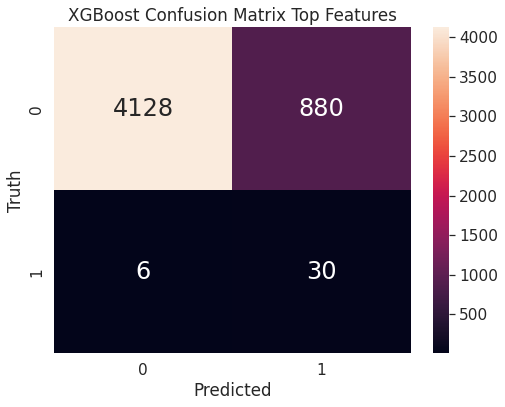

In [93]:
model_df_cm = pd.DataFrame(confusion_matrix, range(2), range(2)) 
plt.figure(figsize = (8, 6)) 
plt.title('XGBoost Confusion Matrix Top Features')
sn.set(font_scale=1.4) #for label size 
sn.heatmap(model_df_cm, annot=True, annot_kws={"size": 24}, fmt="d") # font size 
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.savefig('./figs/xgboost_cm_top_features.png', dpi=300)

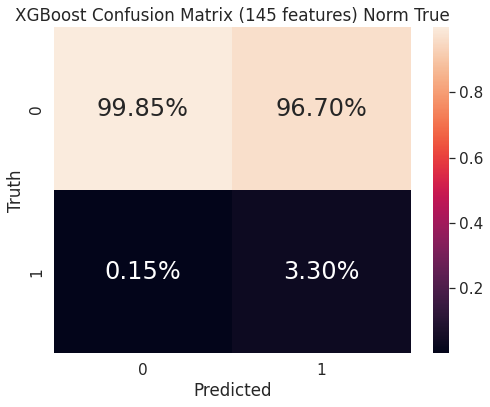

In [94]:
model_df_cm = pd.DataFrame(confusion_matrix, range(2), range(2)) 
plt.figure(figsize = (8, 6)) 
plt.title('XGBoost Confusion Matrix (145 features) Norm True')
sn.set(font_scale=1.4) #for label size 
sn.heatmap(model_df_cm/model_df_cm.astype(np.float).sum(axis=0), annot=True, annot_kws={"size": 24}, fmt='.2%')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.savefig('./figs/xgboost_cm_top_features_norm.png', dpi=300)
# plt.show()

/home/fkirmani/.local/lib/python3.6/site-packages/ipykernel_launcher.py:28: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


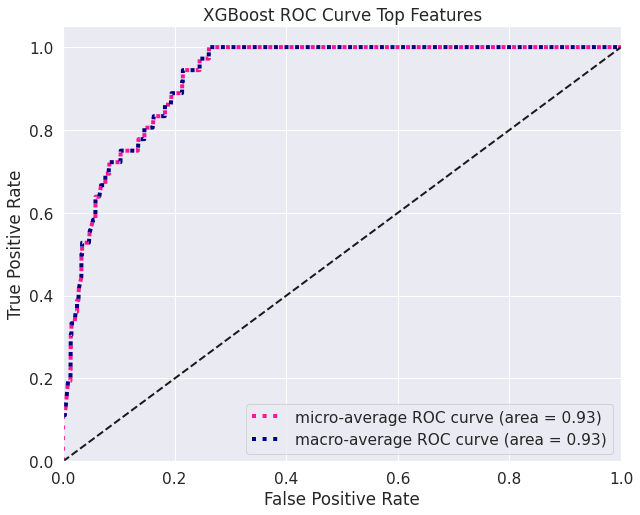

In [96]:
n_classes = 2

plt.figure(figsize = (10, 8)) 

# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred1)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test, y_pred1)
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
# plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes-97), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve Top Features')
plt.legend(loc="lower right")
plt.savefig('./figs/xgboost_ROC_curve_top_features.png', dpi=300)

### AIX360

Reference: https://github.com/Trusted-AI/AIX360/blob/master/examples/tutorials/HELOC.ipynb

In [ ]:
from IPython.core.display import display, HTML

from aix360.algorithms.contrastive import CEMExplainer, KerasClassifier
from aix360.algorithms.protodash import ProtodashExplainer

In [66]:
df_test_selected_features = pd.concat([X_test_selected_feat, y_test], axis=1)

In [67]:
df_test_selected_features

,DO_mgl,DO_percent,pH,Salinity_PSS,TempW_C,TempA_F,label2
10166,1.840000,20.900000,7.340000,0.39000,21.570000,77.864184,0
3027,6.265108,84.617505,7.892637,18.98539,25.570452,77.864184,0
3503,6.265108,84.617505,8.650000,18.98539,25.570452,77.864184,0
5343,6.265108,84.617505,7.892637,18.98539,25.570452,77.864184,0
22631,5.250000,82.600000,8.290000,32.38000,29.800000,77.864184,1
...,...,...,...,...,...,...,...
10765,6.265108,84.617505,7.892637,18.98539,25.570452,77.864184,0
13480,6.430000,97.900000,8.050000,34.00000,27.140000,77.864184,0
7330,6.160000,80.100000,7.930000,18.98539,21.450000,71.960000,0
17164,5.710000,74.800000,7.570000,0.22000,29.570000,77.864184,0


In [68]:
print("Size of water dataset:", df_test_selected_features.shape)
print("Number of \"No Algae\" records:", np.sum(df_test_selected_features['label2']==0))
print("Number of \"Algae\" records:", np.sum(df_test_selected_features['label2']==1))
print("Water bodies sample:")
df_test_selected_features.head(10).transpose()

Size of water dataset: (5044, 7)
Number of "No Algae" records: 5008
Number of "Algae" records: 36
Water bodies sample:


,10166,3027,3503,5343,22631,1684,23237,9542,18430,12025
DO_mgl,1.840000,6.265108,6.265108,6.265108,5.250000,5.620000,7.090000,6.265108,4.19000,6.265108
DO_percent,20.900000,84.617505,84.617505,84.617505,82.600000,78.900000,115.500000,84.617505,67.70000,84.617505
pH,7.340000,7.892637,8.650000,7.892637,8.290000,7.910000,8.300000,7.892637,8.08000,7.892637
Salinity_PSS,0.390000,18.985390,18.985390,18.985390,32.380000,19.780000,29.650000,18.985390,18.98539,18.985390
TempW_C,21.570000,25.570452,25.570452,25.570452,29.800000,27.055600,32.770000,25.570452,31.34000,25.570452
TempA_F,77.864184,77.864184,77.864184,77.864184,77.864184,77.864184,77.864184,77.864184,88.70000,77.864184
label2,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000


Distribution of Salinity_PSS and pH columns:


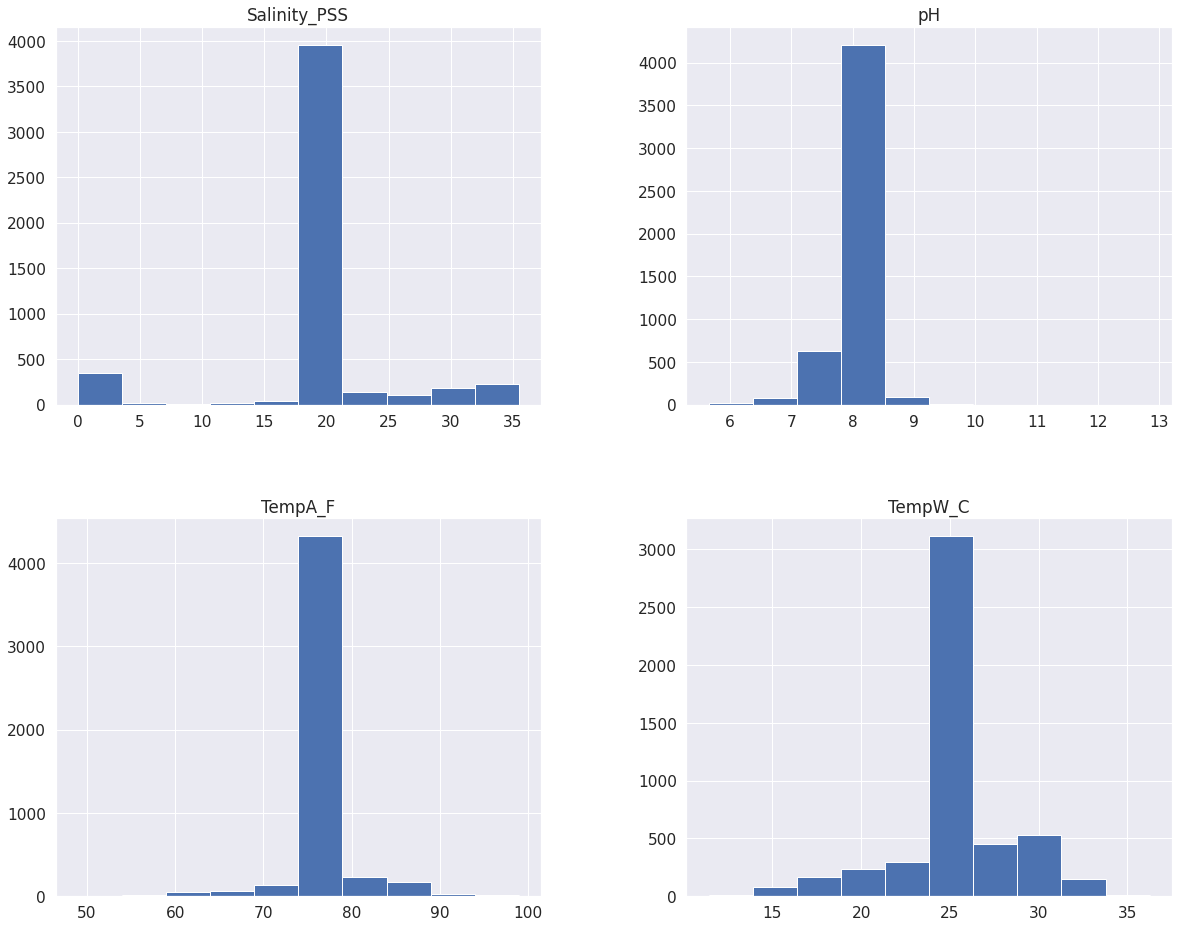

In [69]:
# Plot (example) distributions for two features
print("Distribution of Salinity_PSS and pH columns:")
hist = df_test_selected_features.hist(column=['Salinity_PSS', 'pH', 'TempA_F', 'TempW_C'], bins=10)

In [70]:
df_test_selected_features.iloc[:,0:6]

,DO_mgl,DO_percent,pH,Salinity_PSS,TempW_C,TempA_F
10166,1.840000,20.900000,7.340000,0.39000,21.570000,77.864184
3027,6.265108,84.617505,7.892637,18.98539,25.570452,77.864184
3503,6.265108,84.617505,8.650000,18.98539,25.570452,77.864184
5343,6.265108,84.617505,7.892637,18.98539,25.570452,77.864184
22631,5.250000,82.600000,8.290000,32.38000,29.800000,77.864184
...,...,...,...,...,...,...
10765,6.265108,84.617505,7.892637,18.98539,25.570452,77.864184
13480,6.430000,97.900000,8.050000,34.00000,27.140000,77.864184
7330,6.160000,80.100000,7.930000,18.98539,21.450000,71.960000
17164,5.710000,74.800000,7.570000,0.22000,29.570000,77.864184


#### Obtain similar samples as explanations for a water bodies data predicted as "0" (No Algal) (Example 1)

In [71]:
p_train = CV_xgb2.predict(df_test_selected_features.iloc[:,0:6]) # Use trained neural network to predict train points
p_train = p_train.reshape((p_train.shape[0],1))

z_train = np.hstack((df_test_selected_features.iloc[:,0:6], p_train)) # Store (normalized) instances that were predicted as Good
z_train_no_algal = z_train[z_train[:,-1]==0, :]

In [72]:
class_names = [0, 1]

In [73]:
X = df_test_selected_features[df_test_selected_features['label2']==0].sample(n = 1, random_state = 880).drop('label2', axis=1)

idx = X.index[0]

print("Chosen Sample:", idx)
print("Prediction made by the model:", class_names[np.argmax(CV_xgb2.predict_proba(X))])
print("Prediction probabilities:", CV_xgb2.predict_proba(X))
print("")

# attach the prediction made by the model to X
X = np.hstack((X, CV_xgb2.predict(X).reshape((1,1))))

Xun = df_test_selected_features.iloc[:,0:6].loc[[idx]]
dfx = pd.DataFrame.from_records(Xun.astype('double')) # Create dataframe with original feature values
dfx[23] = class_names[int(X[0, -1])]
dfx.columns = df_test_selected_features.columns
dfx.transpose()

Chosen Sample: 20701
Prediction made by the model: 0
Prediction probabilities: [[0.92773473 0.0722653 ]]



,0
DO_mgl,6.265108
DO_percent,84.617505
pH,7.892637
Salinity_PSS,18.985390
TempW_C,25.570452
TempA_F,77.864184
label2,0.000000


#### Find similar water body example predicted as "0" (No Algal) using the protodash explainer.

In [74]:
explainer = ProtodashExplainer()
(W, S, setValues) = explainer.explain(X, z_train_no_algal, m=5) # Return weights W, Prototypes S and objective function values

#### Display similar water body profiles and the extent to which they are similar to the chosen water body as indicated by the last row in the table below labelled as "Weight".

#### Find similar water body example predicted as "0" (No Algal) using the protodash explainer.

In [97]:
dfs = pd.DataFrame.from_records(z_train_no_algal[S, 0:-1].astype('double'))
RP=[]
for i in range(S.shape[0]):
    RP.append(class_names[int(z_train_no_algal[S[i], -1])]) # Append class names
dfs[23] = RP
dfs.columns = df_test_selected_features.columns  
dfs["Weight"] = np.around(W, 5)/np.sum(np.around(W, 5)) # Calculate normalized importance weights
dfs.transpose()

,0,1,2,3,4
DO_mgl,6.265108,6.265108,5.250000,6.265108,4.19000
DO_percent,84.617505,84.617505,82.600000,84.617505,67.70000
pH,7.892637,8.650000,8.290000,7.892637,8.08000
Salinity_PSS,18.985390,18.985390,32.380000,18.985390,18.98539
TempW_C,25.570452,25.570452,29.800000,25.570452,31.34000
TempA_F,77.864184,77.864184,77.864184,77.864184,88.70000
label2,0.000000,0.000000,0.000000,0.000000,0.00000
Weight,1.000000,0.000000,0.000000,0.000000,0.00000


#### Compute how similar a feature of a prototypical water body is to the chosen water body profile.

In [99]:
z = z_train_no_algal[S, 0:-1] # Store chosen prototypes
eps = 1e-10 # Small constant defined to eliminate divide-by-zero errors
fwt = np.zeros(z.shape)
for i in range (z.shape[0]):
    for j in range(z.shape[1]):
        fwt[i, j] = np.exp(-1 * abs(X[0, j] - z[i,j])/(np.std(z[:, j])+eps)) # Compute feature similarity in [0,1]
                
# move wts to a dataframe to display
dfw = pd.DataFrame.from_records(np.around(fwt.astype('double'), 2))
dfw.columns = df_test_selected_features.columns[:-1]
dfw.transpose()  

,0,1,2,3,4
DO_mgl,1.0,1.00,0.29,1.0,0.08
DO_percent,1.0,1.00,0.74,1.0,0.08
pH,1.0,0.07,0.25,1.0,0.52
Salinity_PSS,1.0,1.00,0.08,1.0,1.00
TempW_C,1.0,1.00,0.18,1.0,0.10
TempA_F,1.0,1.00,1.00,1.0,0.08


#### Obtain similar samples as explanations for a water bodies data predicted as "1" (Algal) (Example 2)

In [100]:
p_train = CV_xgb2.predict(df_test_selected_features.iloc[:,0:6]) # Use trained neural network to predict train points
p_train = p_train.reshape((p_train.shape[0],1))

z_train = np.hstack((df_test_selected_features.iloc[:,0:6], p_train)) # Store (normalized) instances that were predicted as Good
z_train_algal = z_train[z_train[:,-1]==1, :]

In [101]:
class_names = [0, 1]

In [103]:
X = df_test_selected_features[df_test_selected_features['label2']==1].sample(n = 1, random_state = 880).drop('label2', axis=1)

idx = X.index[0]

print("Chosen Sample:", idx)
print("Prediction made by the model:", class_names[np.argmax(CV_xgb2.predict_proba(X))])
print("Prediction probabilities:", CV_xgb2.predict_proba(X))
print("")

# attach the prediction made by the model to X
X = np.hstack((X, CV_xgb2.predict(X).reshape((1,1))))

Xun = df_test_selected_features.iloc[:,0:6].loc[[idx]]
dfx = pd.DataFrame.from_records(Xun.astype('double')) # Create dataframe with original feature values
dfx[23] = class_names[int(X[0, -1])]
dfx.columns = df_test_selected_features.columns
dfx.transpose()

Chosen Sample: 21176
Prediction made by the model: 1
Prediction probabilities: [[0.18688595 0.81311405]]



,0
DO_mgl,8.820000
DO_percent,130.000000
pH,8.530000
Salinity_PSS,20.930000
TempW_C,29.820000
TempA_F,77.864184
label2,1.000000


#### Find similar water body example predicted as "1" (Algal) using the protodash explainer.

In [104]:
explainer = ProtodashExplainer()
(W, S, setValues) = explainer.explain(X, z_train_algal, m=5) # Return weights W, Prototypes S and objective function values

#### Display similar water body profiles and the extent to which they are similar to the chosen water body as indicated by the last row in the table below labelled as "Weight".

#### Find similar water body example predicted as "0" (No Algal) using the protodash explainer.

In [105]:
dfs = pd.DataFrame.from_records(z_train_algal[S, 0:-1].astype('double'))
RP=[]
for i in range(S.shape[0]):
    RP.append(class_names[int(z_train_algal[S[i], -1])]) # Append class names
dfs[23] = RP
dfs.columns = df_test_selected_features.columns  
dfs["Weight"] = np.around(W, 5)/np.sum(np.around(W, 5)) # Calculate normalized importance weights
dfs.transpose()

,0,1,2,3,4
DO_mgl,8.820000,5.620000,7.090000,7.020000,5.42000
DO_percent,130.000000,78.900000,115.500000,103.500000,75.70000
pH,8.530000,7.910000,8.300000,8.250000,7.77000
Salinity_PSS,20.930000,19.780000,29.650000,24.660000,18.98539
TempW_C,29.820000,27.055600,32.770000,28.400000,24.53000
TempA_F,77.864184,77.864184,77.864184,77.864184,79.34000
label2,1.000000,1.000000,1.000000,1.000000,1.00000
Weight,1.000000,0.000000,0.000000,0.000000,0.00000


#### Compute how similar a feature of a prototypical water body is to the chosen water body profile.

In [107]:
z = z_train_algal[S, 0:-1] # Store chosen prototypes
eps = 1e-10 # Small constant defined to eliminate divide-by-zero errors
fwt = np.zeros(z.shape)
for i in range (z.shape[0]):
    for j in range(z.shape[1]):
        fwt[i, j] = np.exp(-1 * abs(X[0, j] - z[i,j])/(np.std(z[:, j])+eps)) # Compute feature similarity in [0,1]
                
# move wts to a dataframe to display
dfw = pd.DataFrame.from_records(np.around(fwt.astype('double'), 2))
dfw.columns = df_test_selected_features.columns[:-1]
dfw.transpose()  

,0,1,2,3,4
DO_mgl,1.0,0.07,0.24,0.23,0.06
DO_percent,1.0,0.09,0.50,0.28,0.07
pH,1.0,0.11,0.43,0.36,0.06
Salinity_PSS,1.0,0.75,0.11,0.39,0.61
TempW_C,1.0,0.37,0.34,0.60,0.15
TempA_F,1.0,1.00,1.00,1.00,0.08
